# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

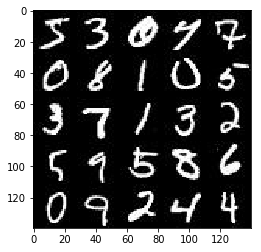

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

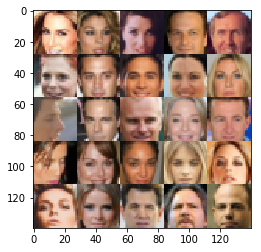

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


TensorFlow Version: 1.4.0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    input_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    input_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    in_learning_rate = tf.placeholder(tf.float32, None, name='learning_rate')
    return input_real, input_z, in_learning_rate



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    alpha = 0.1
    
    with tf.variable_scope('discriminator', reuse=reuse):
        
        # First convolutional layer
        conv1 = tf.layers.conv2d(images, 56, 5, 2, 'SAME')
        conv1 = tf.maximum(alpha*conv1, conv1)
        
        # Second convolutional layer
        conv2 = tf.layers.conv2d(conv1, 112, 5, 2, 'SAME')
        conv2 = tf.layers.batch_normalization(conv2, training=True)
        conv2 = tf.maximum(alpha*conv2, conv2)
        
        # Third convolutional layer
        conv3 = tf.layers.conv2d(conv2, 224, 5, 2, 'SAME')
        conv3 = tf.layers.batch_normalization(conv3, training=True)
        conv3 = tf.maximum(alpha*conv3, conv3)
        
        # Output fully connected layer
        flat   = tf.reshape(conv3, (-1, 4*4*224))
        logits = tf.layers.dense(flat, 1)
        
        ### REVIEWER TIP ####
        # Apply dropout so that discriminator 
        # is less prone to learning the data distribution
        logits = tf.layers.dropout(logits, rate=0.5)
        
        output = tf.sigmoid(logits)
        
    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    alpha = 0.1
    
    with tf.variable_scope('generator', reuse=not(is_train)):
        
        # Input fully connected layer
        fully = tf.layers.dense(z, 7*7*112)
        fully = tf.reshape(fully, (-1, 7, 7, 112))
        fully = tf.layers.batch_normalization(fully, training=is_train)
        fully = tf.maximum(alpha*fully, fully)
        
        # First convolutional layer
        conv1 = tf.layers.conv2d_transpose(fully, 56, 5, 2, 'SAME')
        conv1 = tf.layers.batch_normalization(conv1, training=is_train)
        conv1 = tf.maximum(alpha*conv1, conv1)
        
        # Output convolutional layer
        conv2 = tf.layers.conv2d_transpose(conv1, out_channel_dim, 5, 2, 'SAME')
        out = tf.tanh(conv2)

    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
import numpy as np
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    # Generator model
    g_model = generator(input_z, out_channel_dim)
    
    # Discriminator models
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, True)
    
    # Discriminator losses
    #### REVIEWER TIP ####
    # Use 'One Sided Label Smoothing' on labels
    d_loss_real = tf.reduce_mean( \
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, \
        labels=tf.ones_like(d_logits_real)*np.random.uniform(0.7, 1.2)))
    d_loss_fake=tf.reduce_mean( \
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, \
        labels=tf.zeros_like(d_logits_fake)*np.random.uniform(0.0, 0.3)))
    d_loss = d_loss_real + d_loss_fake
    
    # Generator loss
    g_loss = tf.reduce_mean( \
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    train_vars = tf.trainable_variables()
    dis_vars = [var for var in train_vars if var.name.startswith('discriminator')]
    gen_vars = [var for var in train_vars if var.name.startswith('generator')]
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    gen_updates = [op for op in update_ops if op.name.startswith('generator')]
    
    with tf.control_dependencies(gen_updates):
        dis_train_ops = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=dis_vars)
        gen_train_ops = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=gen_vars)
    
        return dis_train_ops, gen_train_ops



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)

    steps = 0
    print_every = 10
    show_every = 100

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model

                steps += 1
                
                #### REVIEWER SUGGESTION ####
                # Normalize input to be between -1 and 1 to match generator's images
                batch_images = batch_images*2
                
                # Get input noise
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
            
                if steps % print_every == 0:
                    train_loss_d = d_loss.eval(feed_dict={input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval(feed_dict={input_z: batch_z})
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, batch_size, input_z, data_shape[3], data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.3564... Generator Loss: 1.2074
Epoch 1/2... Discriminator Loss: 4.3498... Generator Loss: 0.0361
Epoch 1/2... Discriminator Loss: 3.2669... Generator Loss: 0.0337
Epoch 1/2... Discriminator Loss: 5.7295... Generator Loss: 10.2102
Epoch 1/2... Discriminator Loss: 1.8424... Generator Loss: 0.3214
Epoch 1/2... Discriminator Loss: 2.4417... Generator Loss: 0.1142
Epoch 1/2... Discriminator Loss: 1.6451... Generator Loss: 0.3081
Epoch 1/2... Discriminator Loss: 1.1476... Generator Loss: 0.3922
Epoch 1/2... Discriminator Loss: 1.1086... Generator Loss: 0.4613
Epoch 1/2... Discriminator Loss: 1.5706... Generator Loss: 0.1939


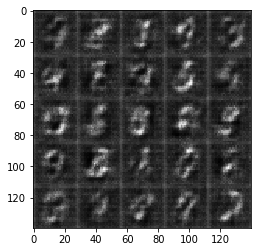

Epoch 1/2... Discriminator Loss: 1.5336... Generator Loss: 0.2452
Epoch 1/2... Discriminator Loss: 1.9156... Generator Loss: 0.1278
Epoch 1/2... Discriminator Loss: 1.7444... Generator Loss: 0.1385
Epoch 1/2... Discriminator Loss: 0.8351... Generator Loss: 0.6808
Epoch 1/2... Discriminator Loss: 0.6186... Generator Loss: 1.6759
Epoch 1/2... Discriminator Loss: 0.8438... Generator Loss: 0.7310
Epoch 1/2... Discriminator Loss: 0.9190... Generator Loss: 2.7617
Epoch 1/2... Discriminator Loss: 1.0479... Generator Loss: 0.3948
Epoch 1/2... Discriminator Loss: 1.0299... Generator Loss: 0.5150
Epoch 1/2... Discriminator Loss: 2.6437... Generator Loss: 0.0619


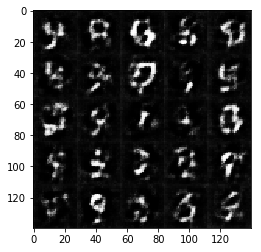

Epoch 1/2... Discriminator Loss: 0.7923... Generator Loss: 0.6216
Epoch 1/2... Discriminator Loss: 1.0133... Generator Loss: 0.4322
Epoch 1/2... Discriminator Loss: 0.8136... Generator Loss: 0.5652
Epoch 1/2... Discriminator Loss: 0.7430... Generator Loss: 0.5235
Epoch 1/2... Discriminator Loss: 0.6060... Generator Loss: 1.4900
Epoch 1/2... Discriminator Loss: 1.1460... Generator Loss: 0.3122
Epoch 1/2... Discriminator Loss: 0.4300... Generator Loss: 3.4336
Epoch 1/2... Discriminator Loss: 1.3752... Generator Loss: 0.2444
Epoch 1/2... Discriminator Loss: 0.8330... Generator Loss: 0.5696
Epoch 1/2... Discriminator Loss: 0.5506... Generator Loss: 0.8666


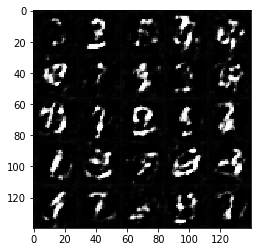

Epoch 1/2... Discriminator Loss: 1.4377... Generator Loss: 0.4232
Epoch 1/2... Discriminator Loss: 0.4450... Generator Loss: 1.4658
Epoch 1/2... Discriminator Loss: 1.9107... Generator Loss: 0.1202
Epoch 1/2... Discriminator Loss: 0.8743... Generator Loss: 0.5671
Epoch 1/2... Discriminator Loss: 0.1087... Generator Loss: 1.2103
Epoch 1/2... Discriminator Loss: 1.8000... Generator Loss: 0.2256
Epoch 1/2... Discriminator Loss: 0.0635... Generator Loss: 2.0989
Epoch 1/2... Discriminator Loss: 0.3644... Generator Loss: 1.1590
Epoch 1/2... Discriminator Loss: 0.7511... Generator Loss: 0.6491
Epoch 1/2... Discriminator Loss: 0.3961... Generator Loss: 1.0902


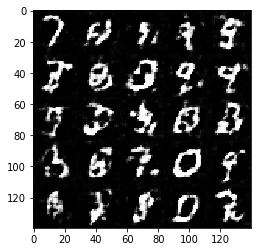

Epoch 1/2... Discriminator Loss: 1.9565... Generator Loss: 0.1685
Epoch 1/2... Discriminator Loss: 1.9576... Generator Loss: 0.1590
Epoch 1/2... Discriminator Loss: 0.9714... Generator Loss: 0.7263
Epoch 1/2... Discriminator Loss: 0.8141... Generator Loss: 0.6393
Epoch 1/2... Discriminator Loss: 0.0779... Generator Loss: 1.9542
Epoch 1/2... Discriminator Loss: 0.7441... Generator Loss: 1.0763
Epoch 1/2... Discriminator Loss: 1.5243... Generator Loss: 0.3687
Epoch 1/2... Discriminator Loss: 0.2440... Generator Loss: 2.0591
Epoch 1/2... Discriminator Loss: 1.2010... Generator Loss: 0.4171
Epoch 1/2... Discriminator Loss: 0.8929... Generator Loss: 0.6140


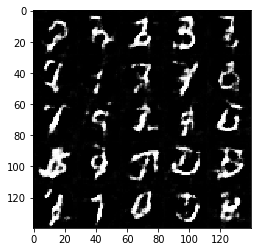

Epoch 1/2... Discriminator Loss: 0.6760... Generator Loss: 1.1168
Epoch 1/2... Discriminator Loss: 0.2922... Generator Loss: 4.4029
Epoch 1/2... Discriminator Loss: 1.2208... Generator Loss: 0.5837
Epoch 1/2... Discriminator Loss: 0.9224... Generator Loss: 0.5491
Epoch 1/2... Discriminator Loss: 0.4232... Generator Loss: 1.7782
Epoch 1/2... Discriminator Loss: 0.5764... Generator Loss: 0.9339
Epoch 1/2... Discriminator Loss: 1.2850... Generator Loss: 0.3772
Epoch 1/2... Discriminator Loss: 1.8400... Generator Loss: 0.1592
Epoch 1/2... Discriminator Loss: 0.9339... Generator Loss: 0.5834
Epoch 1/2... Discriminator Loss: 1.7224... Generator Loss: 0.2912


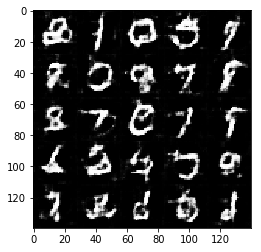

Epoch 1/2... Discriminator Loss: 0.5336... Generator Loss: 0.8346
Epoch 1/2... Discriminator Loss: 0.7331... Generator Loss: 0.6585
Epoch 1/2... Discriminator Loss: 1.1000... Generator Loss: 0.8379
Epoch 1/2... Discriminator Loss: 1.1259... Generator Loss: 0.5154
Epoch 1/2... Discriminator Loss: 0.5082... Generator Loss: 0.8775
Epoch 1/2... Discriminator Loss: 0.7788... Generator Loss: 3.3174
Epoch 1/2... Discriminator Loss: 1.0088... Generator Loss: 0.4839
Epoch 1/2... Discriminator Loss: 1.2371... Generator Loss: 0.3249
Epoch 1/2... Discriminator Loss: 0.6463... Generator Loss: 1.2067
Epoch 1/2... Discriminator Loss: 1.3405... Generator Loss: 0.3237


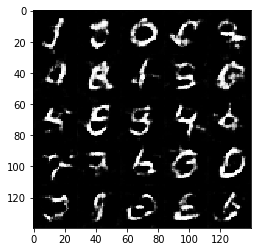

Epoch 1/2... Discriminator Loss: 1.6184... Generator Loss: 0.3930
Epoch 1/2... Discriminator Loss: 0.4323... Generator Loss: 1.2757
Epoch 1/2... Discriminator Loss: 1.1071... Generator Loss: 0.4100
Epoch 1/2... Discriminator Loss: 1.5082... Generator Loss: 0.4075
Epoch 1/2... Discriminator Loss: 0.6377... Generator Loss: 1.9600
Epoch 1/2... Discriminator Loss: 0.3063... Generator Loss: 1.1187
Epoch 1/2... Discriminator Loss: 0.7996... Generator Loss: 0.6612
Epoch 1/2... Discriminator Loss: 1.2177... Generator Loss: 0.3730
Epoch 1/2... Discriminator Loss: 0.5450... Generator Loss: 3.5300
Epoch 1/2... Discriminator Loss: 0.6142... Generator Loss: 2.8991


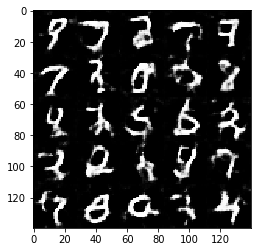

Epoch 1/2... Discriminator Loss: 1.0132... Generator Loss: 0.5298
Epoch 1/2... Discriminator Loss: 1.5555... Generator Loss: 0.2183
Epoch 1/2... Discriminator Loss: 0.9949... Generator Loss: 0.5061
Epoch 1/2... Discriminator Loss: 1.9194... Generator Loss: 0.1658
Epoch 1/2... Discriminator Loss: 1.1620... Generator Loss: 0.3796
Epoch 1/2... Discriminator Loss: 1.3751... Generator Loss: 0.3309
Epoch 1/2... Discriminator Loss: 0.3337... Generator Loss: 2.2032
Epoch 1/2... Discriminator Loss: 0.7779... Generator Loss: 0.6610
Epoch 1/2... Discriminator Loss: 0.4057... Generator Loss: 1.0190
Epoch 1/2... Discriminator Loss: 1.0698... Generator Loss: 0.4735


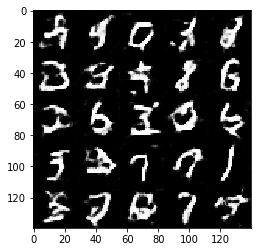

Epoch 1/2... Discriminator Loss: 0.8221... Generator Loss: 0.5866
Epoch 1/2... Discriminator Loss: 1.0596... Generator Loss: 0.4845
Epoch 1/2... Discriminator Loss: 1.0905... Generator Loss: 0.5091
Epoch 1/2... Discriminator Loss: 2.2148... Generator Loss: 0.1661
Epoch 1/2... Discriminator Loss: 0.3054... Generator Loss: 1.5938
Epoch 1/2... Discriminator Loss: 1.2110... Generator Loss: 0.5925
Epoch 1/2... Discriminator Loss: 0.8258... Generator Loss: 0.5917
Epoch 1/2... Discriminator Loss: 0.9480... Generator Loss: 1.6065
Epoch 1/2... Discriminator Loss: 0.5680... Generator Loss: 0.9294
Epoch 1/2... Discriminator Loss: 2.0271... Generator Loss: 0.1535


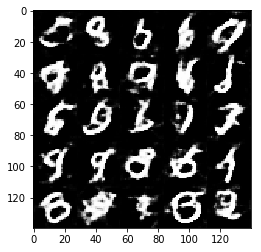

Epoch 1/2... Discriminator Loss: 0.5346... Generator Loss: 0.8119
Epoch 1/2... Discriminator Loss: 1.7594... Generator Loss: 0.3087
Epoch 1/2... Discriminator Loss: 0.0959... Generator Loss: 1.5665
Epoch 1/2... Discriminator Loss: 1.1122... Generator Loss: 0.4255
Epoch 1/2... Discriminator Loss: 0.2482... Generator Loss: 1.8553
Epoch 1/2... Discriminator Loss: 1.7649... Generator Loss: 0.1740
Epoch 1/2... Discriminator Loss: 0.4365... Generator Loss: 1.1448
Epoch 1/2... Discriminator Loss: 0.6295... Generator Loss: 0.8405
Epoch 1/2... Discriminator Loss: 0.8741... Generator Loss: 0.5891
Epoch 1/2... Discriminator Loss: 1.7429... Generator Loss: 4.3227


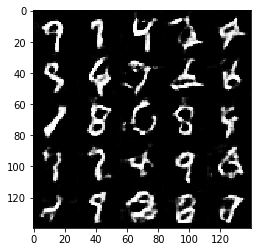

Epoch 1/2... Discriminator Loss: 0.2406... Generator Loss: 1.4664
Epoch 1/2... Discriminator Loss: 0.9229... Generator Loss: 0.5729
Epoch 1/2... Discriminator Loss: 0.5321... Generator Loss: 1.3242
Epoch 1/2... Discriminator Loss: 0.7049... Generator Loss: 0.6008
Epoch 1/2... Discriminator Loss: 0.7468... Generator Loss: 0.6896
Epoch 1/2... Discriminator Loss: 0.8901... Generator Loss: 0.4730
Epoch 1/2... Discriminator Loss: 2.0236... Generator Loss: 0.2890
Epoch 1/2... Discriminator Loss: 2.3277... Generator Loss: 0.1455
Epoch 1/2... Discriminator Loss: 0.6067... Generator Loss: 0.9096
Epoch 1/2... Discriminator Loss: 0.9099... Generator Loss: 0.6119


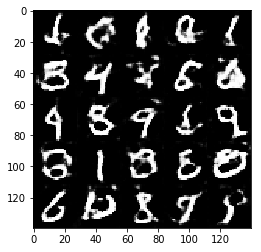

Epoch 1/2... Discriminator Loss: 1.1690... Generator Loss: 0.5391
Epoch 1/2... Discriminator Loss: 1.2659... Generator Loss: 0.3592
Epoch 1/2... Discriminator Loss: 1.1597... Generator Loss: 0.5054
Epoch 1/2... Discriminator Loss: 0.7840... Generator Loss: 0.6181
Epoch 1/2... Discriminator Loss: 0.6084... Generator Loss: 0.8392
Epoch 1/2... Discriminator Loss: 0.8193... Generator Loss: 0.6925
Epoch 1/2... Discriminator Loss: 0.7837... Generator Loss: 1.1467
Epoch 1/2... Discriminator Loss: 1.9612... Generator Loss: 0.1881
Epoch 1/2... Discriminator Loss: 1.4622... Generator Loss: 0.2079
Epoch 1/2... Discriminator Loss: 1.2979... Generator Loss: 0.2932


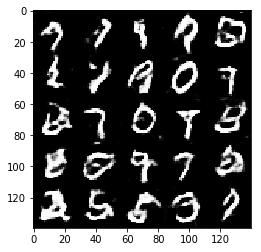

Epoch 1/2... Discriminator Loss: 2.1075... Generator Loss: 0.1489
Epoch 1/2... Discriminator Loss: 1.2521... Generator Loss: 0.3661
Epoch 1/2... Discriminator Loss: 1.3168... Generator Loss: 0.2799
Epoch 1/2... Discriminator Loss: 1.1251... Generator Loss: 0.4005
Epoch 1/2... Discriminator Loss: 0.9254... Generator Loss: 0.5023
Epoch 1/2... Discriminator Loss: 1.2888... Generator Loss: 0.3321
Epoch 1/2... Discriminator Loss: 2.1295... Generator Loss: 0.2201
Epoch 1/2... Discriminator Loss: 1.6340... Generator Loss: 0.3987
Epoch 1/2... Discriminator Loss: 3.0142... Generator Loss: 0.1173
Epoch 1/2... Discriminator Loss: 0.8768... Generator Loss: 0.4876


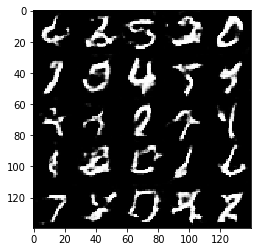

Epoch 1/2... Discriminator Loss: 0.5455... Generator Loss: 1.0324
Epoch 1/2... Discriminator Loss: 3.7916... Generator Loss: 0.0310
Epoch 1/2... Discriminator Loss: 10.3225... Generator Loss: 0.0001
Epoch 1/2... Discriminator Loss: 0.2870... Generator Loss: 1.2556
Epoch 1/2... Discriminator Loss: 0.3555... Generator Loss: 4.3759
Epoch 1/2... Discriminator Loss: 1.2258... Generator Loss: 0.3025
Epoch 1/2... Discriminator Loss: 0.2312... Generator Loss: 1.9443
Epoch 1/2... Discriminator Loss: 1.9039... Generator Loss: 0.1839
Epoch 1/2... Discriminator Loss: 0.2449... Generator Loss: 1.9672
Epoch 1/2... Discriminator Loss: 1.8988... Generator Loss: 0.2088


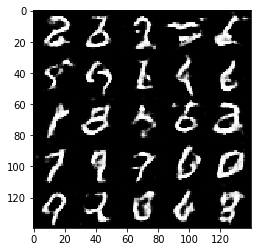

Epoch 1/2... Discriminator Loss: 0.1381... Generator Loss: 2.6171
Epoch 1/2... Discriminator Loss: 1.0603... Generator Loss: 0.6474
Epoch 1/2... Discriminator Loss: 0.5333... Generator Loss: 0.7898
Epoch 1/2... Discriminator Loss: 1.2608... Generator Loss: 0.3075
Epoch 1/2... Discriminator Loss: 3.4891... Generator Loss: 8.3422
Epoch 1/2... Discriminator Loss: 2.8351... Generator Loss: 0.0737
Epoch 1/2... Discriminator Loss: 0.4490... Generator Loss: 0.9942
Epoch 1/2... Discriminator Loss: 0.3545... Generator Loss: 1.1381
Epoch 1/2... Discriminator Loss: 1.5368... Generator Loss: 0.6706
Epoch 1/2... Discriminator Loss: 0.7679... Generator Loss: 0.5679


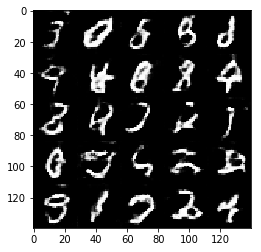

Epoch 1/2... Discriminator Loss: 0.5029... Generator Loss: 0.9765
Epoch 1/2... Discriminator Loss: 0.9419... Generator Loss: 0.6138
Epoch 1/2... Discriminator Loss: 0.4229... Generator Loss: 0.8417
Epoch 1/2... Discriminator Loss: 0.1679... Generator Loss: 1.0246
Epoch 1/2... Discriminator Loss: 2.7171... Generator Loss: 0.1008
Epoch 1/2... Discriminator Loss: 1.0004... Generator Loss: 3.7775
Epoch 1/2... Discriminator Loss: 0.8746... Generator Loss: 0.6500
Epoch 1/2... Discriminator Loss: 0.5701... Generator Loss: 0.8645
Epoch 1/2... Discriminator Loss: 1.7016... Generator Loss: 0.4510
Epoch 1/2... Discriminator Loss: 1.1004... Generator Loss: 0.5691


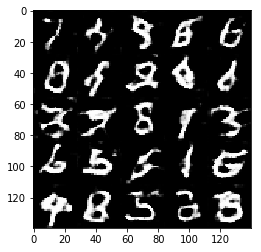

Epoch 1/2... Discriminator Loss: 1.6983... Generator Loss: 0.2629
Epoch 1/2... Discriminator Loss: 0.8415... Generator Loss: 0.5227
Epoch 1/2... Discriminator Loss: 1.2033... Generator Loss: 0.5230
Epoch 1/2... Discriminator Loss: 0.8345... Generator Loss: 0.5996
Epoch 1/2... Discriminator Loss: 1.1907... Generator Loss: 0.6623
Epoch 1/2... Discriminator Loss: 0.7858... Generator Loss: 0.6207
Epoch 1/2... Discriminator Loss: 2.4234... Generator Loss: 0.1706
Epoch 1/2... Discriminator Loss: 0.2009... Generator Loss: 1.3676
Epoch 1/2... Discriminator Loss: 0.1427... Generator Loss: 1.3884
Epoch 1/2... Discriminator Loss: 0.9175... Generator Loss: 0.5902


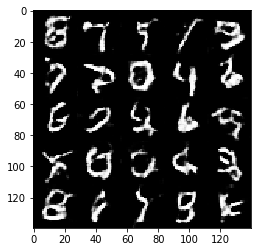

Epoch 1/2... Discriminator Loss: 0.3378... Generator Loss: 1.3156
Epoch 1/2... Discriminator Loss: 1.7058... Generator Loss: 0.2674
Epoch 1/2... Discriminator Loss: 0.4316... Generator Loss: 1.2439
Epoch 1/2... Discriminator Loss: 1.4402... Generator Loss: 0.4975
Epoch 1/2... Discriminator Loss: 1.5891... Generator Loss: 0.5006
Epoch 1/2... Discriminator Loss: 0.7316... Generator Loss: 0.5185
Epoch 1/2... Discriminator Loss: 1.4672... Generator Loss: 0.4176
Epoch 1/2... Discriminator Loss: 0.2766... Generator Loss: 1.7449
Epoch 1/2... Discriminator Loss: 1.4665... Generator Loss: 0.3828
Epoch 1/2... Discriminator Loss: 0.2021... Generator Loss: 1.2886


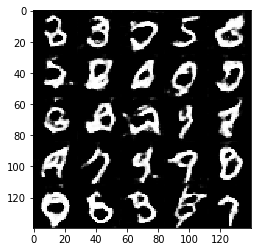

Epoch 1/2... Discriminator Loss: 1.7996... Generator Loss: 0.2010
Epoch 1/2... Discriminator Loss: -0.4943... Generator Loss: 3.7719
Epoch 1/2... Discriminator Loss: 0.9616... Generator Loss: 0.4853
Epoch 1/2... Discriminator Loss: 1.0311... Generator Loss: 0.6602
Epoch 1/2... Discriminator Loss: 1.0483... Generator Loss: 0.8705
Epoch 1/2... Discriminator Loss: 0.4291... Generator Loss: 6.4220
Epoch 1/2... Discriminator Loss: 3.0032... Generator Loss: 0.1957
Epoch 1/2... Discriminator Loss: 1.7697... Generator Loss: 0.4036
Epoch 1/2... Discriminator Loss: 0.8533... Generator Loss: 0.7059
Epoch 1/2... Discriminator Loss: 0.4267... Generator Loss: 0.8673


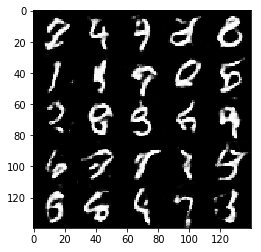

Epoch 1/2... Discriminator Loss: 1.5044... Generator Loss: 5.4663
Epoch 1/2... Discriminator Loss: 1.0927... Generator Loss: 0.7809
Epoch 1/2... Discriminator Loss: 1.9876... Generator Loss: 0.3802
Epoch 1/2... Discriminator Loss: -0.0094... Generator Loss: 1.5841
Epoch 1/2... Discriminator Loss: -0.2412... Generator Loss: 2.0274
Epoch 1/2... Discriminator Loss: 1.6017... Generator Loss: 0.5073
Epoch 1/2... Discriminator Loss: 1.2542... Generator Loss: 0.3540
Epoch 1/2... Discriminator Loss: 1.2633... Generator Loss: 0.5707
Epoch 1/2... Discriminator Loss: 0.4644... Generator Loss: 1.2587
Epoch 1/2... Discriminator Loss: 1.4432... Generator Loss: 0.7952


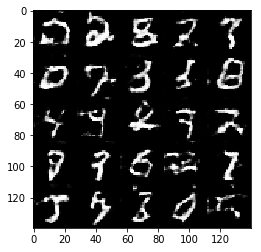

Epoch 1/2... Discriminator Loss: -0.3510... Generator Loss: 3.1884
Epoch 1/2... Discriminator Loss: 2.3334... Generator Loss: 0.2542
Epoch 1/2... Discriminator Loss: 0.2374... Generator Loss: 1.2295
Epoch 1/2... Discriminator Loss: 1.5724... Generator Loss: 0.3844
Epoch 1/2... Discriminator Loss: 0.1214... Generator Loss: 2.1915
Epoch 1/2... Discriminator Loss: 0.2711... Generator Loss: 6.3387
Epoch 1/2... Discriminator Loss: 0.5781... Generator Loss: 2.6591
Epoch 1/2... Discriminator Loss: 0.2439... Generator Loss: 1.7190
Epoch 1/2... Discriminator Loss: 0.0420... Generator Loss: 1.6498
Epoch 1/2... Discriminator Loss: 2.5244... Generator Loss: 0.3776


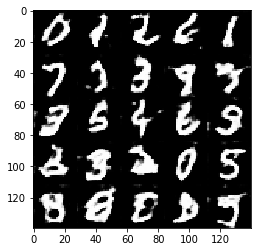

Epoch 1/2... Discriminator Loss: 2.3657... Generator Loss: 0.3290
Epoch 1/2... Discriminator Loss: 0.4800... Generator Loss: 0.8845
Epoch 1/2... Discriminator Loss: 0.1029... Generator Loss: 2.0231
Epoch 1/2... Discriminator Loss: -0.0963... Generator Loss: 1.5790
Epoch 1/2... Discriminator Loss: 1.1928... Generator Loss: 0.6067
Epoch 1/2... Discriminator Loss: 3.6396... Generator Loss: 0.0994
Epoch 1/2... Discriminator Loss: -0.0469... Generator Loss: 2.0134
Epoch 1/2... Discriminator Loss: 2.1754... Generator Loss: 0.2249
Epoch 1/2... Discriminator Loss: 0.9115... Generator Loss: 0.4508
Epoch 1/2... Discriminator Loss: 0.8442... Generator Loss: 1.2256


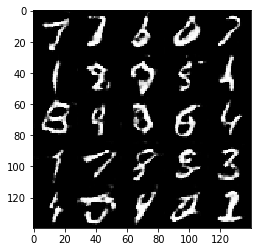

Epoch 1/2... Discriminator Loss: 0.5235... Generator Loss: 1.1613
Epoch 1/2... Discriminator Loss: 1.4405... Generator Loss: 0.5942
Epoch 1/2... Discriminator Loss: 0.2476... Generator Loss: 1.5896
Epoch 1/2... Discriminator Loss: 0.5771... Generator Loss: 1.9240
Epoch 1/2... Discriminator Loss: 0.9584... Generator Loss: 0.4693
Epoch 1/2... Discriminator Loss: 0.7263... Generator Loss: 0.8272
Epoch 1/2... Discriminator Loss: 0.5789... Generator Loss: 0.9549
Epoch 1/2... Discriminator Loss: 1.2570... Generator Loss: 0.4306
Epoch 1/2... Discriminator Loss: -0.2358... Generator Loss: 3.0425
Epoch 1/2... Discriminator Loss: 1.7219... Generator Loss: 0.3337


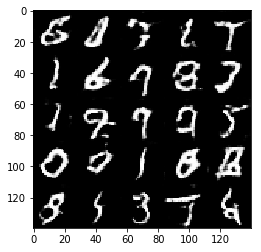

Epoch 2/2... Discriminator Loss: 0.9297... Generator Loss: 1.1830
Epoch 2/2... Discriminator Loss: 1.9470... Generator Loss: 0.5116
Epoch 2/2... Discriminator Loss: 0.0124... Generator Loss: 1.9683
Epoch 2/2... Discriminator Loss: 0.2758... Generator Loss: 1.5653
Epoch 2/2... Discriminator Loss: 0.4680... Generator Loss: 1.0277
Epoch 2/2... Discriminator Loss: 1.9331... Generator Loss: 0.3101
Epoch 2/2... Discriminator Loss: 1.5374... Generator Loss: 0.4515
Epoch 2/2... Discriminator Loss: 2.2429... Generator Loss: 0.2152
Epoch 2/2... Discriminator Loss: 0.7098... Generator Loss: 0.5706
Epoch 2/2... Discriminator Loss: 1.9634... Generator Loss: 0.3350


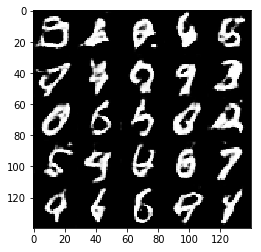

Epoch 2/2... Discriminator Loss: 1.1063... Generator Loss: 0.6845
Epoch 2/2... Discriminator Loss: 0.7565... Generator Loss: 1.3326
Epoch 2/2... Discriminator Loss: 1.6523... Generator Loss: 0.3839
Epoch 2/2... Discriminator Loss: 0.5935... Generator Loss: 0.7051
Epoch 2/2... Discriminator Loss: -0.2383... Generator Loss: 2.9904
Epoch 2/2... Discriminator Loss: 0.6114... Generator Loss: 1.4563
Epoch 2/2... Discriminator Loss: 0.3589... Generator Loss: 0.9609
Epoch 2/2... Discriminator Loss: 0.1549... Generator Loss: 4.8566
Epoch 2/2... Discriminator Loss: 0.4934... Generator Loss: 1.4628
Epoch 2/2... Discriminator Loss: -0.1195... Generator Loss: 1.4637


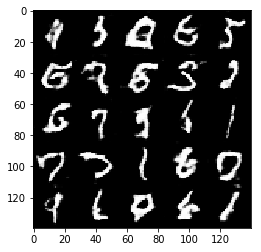

Epoch 2/2... Discriminator Loss: -0.0132... Generator Loss: 1.7816
Epoch 2/2... Discriminator Loss: -0.1027... Generator Loss: 2.2621
Epoch 2/2... Discriminator Loss: 0.4723... Generator Loss: 1.0954
Epoch 2/2... Discriminator Loss: -0.8090... Generator Loss: 3.1667
Epoch 2/2... Discriminator Loss: 1.0179... Generator Loss: 1.0305
Epoch 2/2... Discriminator Loss: 1.0256... Generator Loss: 0.9853
Epoch 2/2... Discriminator Loss: 1.9445... Generator Loss: 0.3720
Epoch 2/2... Discriminator Loss: 1.7442... Generator Loss: 0.4424
Epoch 2/2... Discriminator Loss: 2.9814... Generator Loss: 0.2740
Epoch 2/2... Discriminator Loss: -0.2797... Generator Loss: 2.6111


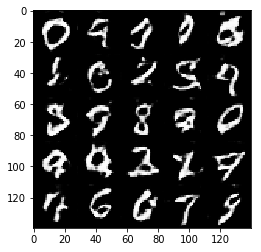

Epoch 2/2... Discriminator Loss: 4.0184... Generator Loss: 0.0506
Epoch 2/2... Discriminator Loss: 1.5810... Generator Loss: 0.9626
Epoch 2/2... Discriminator Loss: 1.6520... Generator Loss: 0.4595
Epoch 2/2... Discriminator Loss: -0.6487... Generator Loss: 3.3593
Epoch 2/2... Discriminator Loss: 1.5899... Generator Loss: 0.7541
Epoch 2/2... Discriminator Loss: 2.0055... Generator Loss: 0.6882
Epoch 2/2... Discriminator Loss: -0.7604... Generator Loss: 3.0602
Epoch 2/2... Discriminator Loss: 2.9351... Generator Loss: 0.2314
Epoch 2/2... Discriminator Loss: 0.6096... Generator Loss: 1.1860
Epoch 2/2... Discriminator Loss: 2.1567... Generator Loss: 0.3270


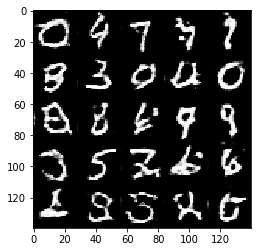

Epoch 2/2... Discriminator Loss: 0.0921... Generator Loss: 1.2785
Epoch 2/2... Discriminator Loss: 2.8178... Generator Loss: 0.5530
Epoch 2/2... Discriminator Loss: 0.7790... Generator Loss: 1.0317
Epoch 2/2... Discriminator Loss: 5.6644... Generator Loss: 13.0023
Epoch 2/2... Discriminator Loss: -0.2912... Generator Loss: 3.0169
Epoch 2/2... Discriminator Loss: 0.1680... Generator Loss: 1.6297
Epoch 2/2... Discriminator Loss: -0.0902... Generator Loss: 3.1507
Epoch 2/2... Discriminator Loss: 2.0257... Generator Loss: 0.3058
Epoch 2/2... Discriminator Loss: 2.3959... Generator Loss: 0.3688
Epoch 2/2... Discriminator Loss: 1.8832... Generator Loss: 1.0431


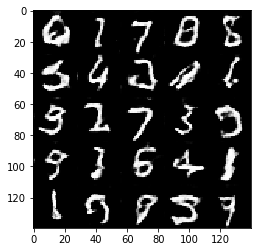

Epoch 2/2... Discriminator Loss: 0.2565... Generator Loss: 2.7366
Epoch 2/2... Discriminator Loss: -0.9235... Generator Loss: 4.3081
Epoch 2/2... Discriminator Loss: 2.9661... Generator Loss: 0.5709
Epoch 2/2... Discriminator Loss: -0.1849... Generator Loss: 2.7397
Epoch 2/2... Discriminator Loss: 0.0908... Generator Loss: 3.1319
Epoch 2/2... Discriminator Loss: -0.1233... Generator Loss: 2.2511
Epoch 2/2... Discriminator Loss: -0.1170... Generator Loss: 4.5194
Epoch 2/2... Discriminator Loss: -0.0244... Generator Loss: 2.0665
Epoch 2/2... Discriminator Loss: 0.5762... Generator Loss: 0.9563
Epoch 2/2... Discriminator Loss: -0.1878... Generator Loss: 1.8361


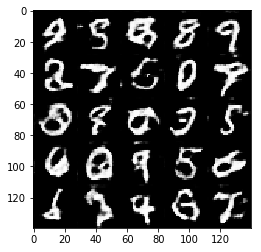

Epoch 2/2... Discriminator Loss: 0.0444... Generator Loss: 7.9572
Epoch 2/2... Discriminator Loss: 0.5535... Generator Loss: 2.2680
Epoch 2/2... Discriminator Loss: -0.1474... Generator Loss: 3.7742
Epoch 2/2... Discriminator Loss: -0.0884... Generator Loss: 10.9822
Epoch 2/2... Discriminator Loss: 1.6646... Generator Loss: 0.7344
Epoch 2/2... Discriminator Loss: 1.9365... Generator Loss: 0.5065
Epoch 2/2... Discriminator Loss: 1.1683... Generator Loss: 0.6049
Epoch 2/2... Discriminator Loss: 0.4744... Generator Loss: 1.4977
Epoch 2/2... Discriminator Loss: -0.5889... Generator Loss: 4.1878
Epoch 2/2... Discriminator Loss: 1.3336... Generator Loss: 0.4427


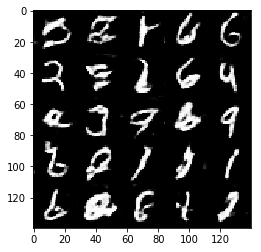

Epoch 2/2... Discriminator Loss: 1.5918... Generator Loss: 0.4507
Epoch 2/2... Discriminator Loss: 1.0506... Generator Loss: 1.0672
Epoch 2/2... Discriminator Loss: 0.0450... Generator Loss: 4.6718
Epoch 2/2... Discriminator Loss: 2.1257... Generator Loss: 0.7155
Epoch 2/2... Discriminator Loss: 3.4004... Generator Loss: 11.9589
Epoch 2/2... Discriminator Loss: 2.4075... Generator Loss: 0.3029
Epoch 2/2... Discriminator Loss: 0.8963... Generator Loss: 0.5947
Epoch 2/2... Discriminator Loss: 0.8529... Generator Loss: 0.9579
Epoch 2/2... Discriminator Loss: 0.8201... Generator Loss: 0.7102
Epoch 2/2... Discriminator Loss: 0.7738... Generator Loss: 1.1374


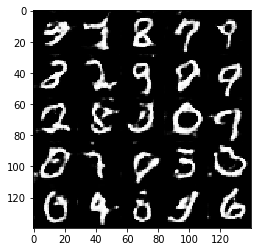

Epoch 2/2... Discriminator Loss: 0.2351... Generator Loss: 1.8096
Epoch 2/2... Discriminator Loss: 1.0274... Generator Loss: 0.9719
Epoch 2/2... Discriminator Loss: 0.8872... Generator Loss: 13.9770
Epoch 2/2... Discriminator Loss: 0.8650... Generator Loss: 0.7337
Epoch 2/2... Discriminator Loss: 1.1725... Generator Loss: 1.2881
Epoch 2/2... Discriminator Loss: 1.8272... Generator Loss: 0.5856
Epoch 2/2... Discriminator Loss: -0.5869... Generator Loss: 2.5604
Epoch 2/2... Discriminator Loss: -1.0301... Generator Loss: 2.7259
Epoch 2/2... Discriminator Loss: -0.6712... Generator Loss: 3.1574
Epoch 2/2... Discriminator Loss: 3.6396... Generator Loss: 0.0796


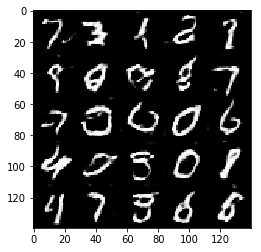

Epoch 2/2... Discriminator Loss: 5.6026... Generator Loss: 15.0456
Epoch 2/2... Discriminator Loss: 0.7203... Generator Loss: 10.2785
Epoch 2/2... Discriminator Loss: 1.0642... Generator Loss: 1.4299
Epoch 2/2... Discriminator Loss: 0.9336... Generator Loss: 0.9669
Epoch 2/2... Discriminator Loss: 1.5687... Generator Loss: 0.3883
Epoch 2/2... Discriminator Loss: 1.7939... Generator Loss: 0.7613
Epoch 2/2... Discriminator Loss: 2.1811... Generator Loss: 0.4885
Epoch 2/2... Discriminator Loss: 3.9789... Generator Loss: 0.3432
Epoch 2/2... Discriminator Loss: 1.0472... Generator Loss: 1.2404
Epoch 2/2... Discriminator Loss: 1.4952... Generator Loss: 0.8442


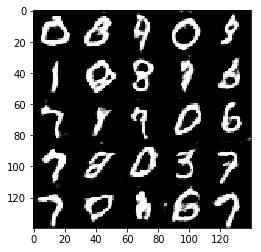

Epoch 2/2... Discriminator Loss: 0.2722... Generator Loss: 1.4620
Epoch 2/2... Discriminator Loss: 5.5847... Generator Loss: 0.0284
Epoch 2/2... Discriminator Loss: 0.1837... Generator Loss: 6.4660
Epoch 2/2... Discriminator Loss: -0.5024... Generator Loss: 3.2288
Epoch 2/2... Discriminator Loss: 0.2139... Generator Loss: 5.1627
Epoch 2/2... Discriminator Loss: 1.3200... Generator Loss: 1.0079
Epoch 2/2... Discriminator Loss: 1.9859... Generator Loss: 0.2009
Epoch 2/2... Discriminator Loss: 0.4598... Generator Loss: 2.3483
Epoch 2/2... Discriminator Loss: 0.2741... Generator Loss: 1.4318
Epoch 2/2... Discriminator Loss: 2.4383... Generator Loss: 0.6099


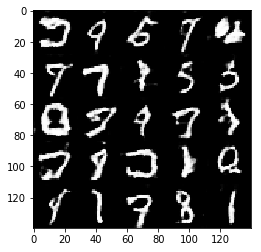

Epoch 2/2... Discriminator Loss: -0.7218... Generator Loss: 2.9313
Epoch 2/2... Discriminator Loss: 2.1587... Generator Loss: 0.6621
Epoch 2/2... Discriminator Loss: 0.2517... Generator Loss: 6.9361
Epoch 2/2... Discriminator Loss: -0.0027... Generator Loss: 2.1502
Epoch 2/2... Discriminator Loss: 0.5753... Generator Loss: 1.2988
Epoch 2/2... Discriminator Loss: 2.0116... Generator Loss: 0.4916
Epoch 2/2... Discriminator Loss: 1.1219... Generator Loss: 0.9712
Epoch 2/2... Discriminator Loss: 2.9475... Generator Loss: 0.7325
Epoch 2/2... Discriminator Loss: 2.1162... Generator Loss: 0.4529
Epoch 2/2... Discriminator Loss: -0.2840... Generator Loss: 2.7272


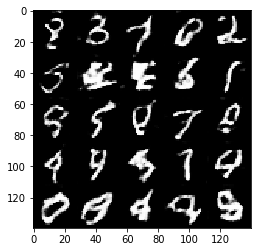

Epoch 2/2... Discriminator Loss: 2.3849... Generator Loss: 0.1456
Epoch 2/2... Discriminator Loss: 1.1102... Generator Loss: 0.5363
Epoch 2/2... Discriminator Loss: 5.4257... Generator Loss: 0.0619
Epoch 2/2... Discriminator Loss: 1.8726... Generator Loss: 1.0197
Epoch 2/2... Discriminator Loss: -0.2129... Generator Loss: 3.4308
Epoch 2/2... Discriminator Loss: 0.1498... Generator Loss: 3.1685
Epoch 2/2... Discriminator Loss: -0.1290... Generator Loss: 2.0231
Epoch 2/2... Discriminator Loss: 1.3614... Generator Loss: 0.5157
Epoch 2/2... Discriminator Loss: 0.6892... Generator Loss: 1.3829
Epoch 2/2... Discriminator Loss: 3.3579... Generator Loss: 0.5653


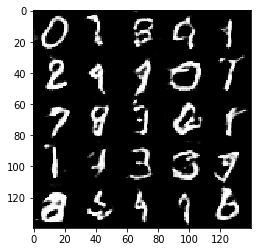

Epoch 2/2... Discriminator Loss: 1.9678... Generator Loss: 1.1172
Epoch 2/2... Discriminator Loss: 1.7063... Generator Loss: 1.0478
Epoch 2/2... Discriminator Loss: 1.2053... Generator Loss: 2.1159
Epoch 2/2... Discriminator Loss: -0.4549... Generator Loss: 2.6978
Epoch 2/2... Discriminator Loss: 0.1896... Generator Loss: 1.6139
Epoch 2/2... Discriminator Loss: -0.0955... Generator Loss: 4.0890
Epoch 2/2... Discriminator Loss: 0.0186... Generator Loss: 1.8864
Epoch 2/2... Discriminator Loss: 0.1577... Generator Loss: 2.4767
Epoch 2/2... Discriminator Loss: 6.1062... Generator Loss: 0.2440
Epoch 2/2... Discriminator Loss: 2.5187... Generator Loss: 0.7820


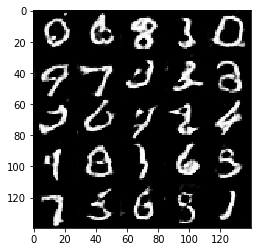

Epoch 2/2... Discriminator Loss: 5.4525... Generator Loss: 0.1361
Epoch 2/2... Discriminator Loss: 1.8609... Generator Loss: 1.0673
Epoch 2/2... Discriminator Loss: 1.8487... Generator Loss: 0.5136
Epoch 2/2... Discriminator Loss: -0.0269... Generator Loss: 4.1144
Epoch 2/2... Discriminator Loss: -0.2913... Generator Loss: 7.0401
Epoch 2/2... Discriminator Loss: 0.1724... Generator Loss: 3.6676
Epoch 2/2... Discriminator Loss: -0.4530... Generator Loss: 8.0557
Epoch 2/2... Discriminator Loss: 0.2252... Generator Loss: 1.6573
Epoch 2/2... Discriminator Loss: -0.3378... Generator Loss: 4.0127
Epoch 2/2... Discriminator Loss: 1.9592... Generator Loss: 1.3489


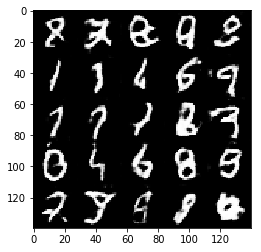

Epoch 2/2... Discriminator Loss: -0.9473... Generator Loss: 8.2227
Epoch 2/2... Discriminator Loss: 0.9822... Generator Loss: 0.9388
Epoch 2/2... Discriminator Loss: -0.1565... Generator Loss: 4.4529
Epoch 2/2... Discriminator Loss: 0.0704... Generator Loss: 2.9311
Epoch 2/2... Discriminator Loss: 2.3082... Generator Loss: 0.5618
Epoch 2/2... Discriminator Loss: 2.4830... Generator Loss: 15.6112
Epoch 2/2... Discriminator Loss: -0.4931... Generator Loss: 2.1462
Epoch 2/2... Discriminator Loss: 4.9148... Generator Loss: 0.2638
Epoch 2/2... Discriminator Loss: 4.4238... Generator Loss: 0.3246
Epoch 2/2... Discriminator Loss: 7.9907... Generator Loss: 0.0055


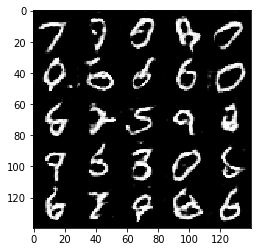

Epoch 2/2... Discriminator Loss: 1.0351... Generator Loss: 1.4184
Epoch 2/2... Discriminator Loss: 0.0982... Generator Loss: 2.9375
Epoch 2/2... Discriminator Loss: -0.6471... Generator Loss: 3.5720
Epoch 2/2... Discriminator Loss: 0.0180... Generator Loss: 2.3775
Epoch 2/2... Discriminator Loss: 0.8515... Generator Loss: 2.1642
Epoch 2/2... Discriminator Loss: 2.3764... Generator Loss: 1.4346
Epoch 2/2... Discriminator Loss: 3.9000... Generator Loss: 0.7717
Epoch 2/2... Discriminator Loss: 1.5296... Generator Loss: 1.7092
Epoch 2/2... Discriminator Loss: 0.0394... Generator Loss: 2.6407
Epoch 2/2... Discriminator Loss: -0.3617... Generator Loss: 3.5888


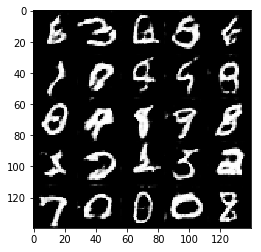

Epoch 2/2... Discriminator Loss: -0.0449... Generator Loss: 2.4528
Epoch 2/2... Discriminator Loss: 2.8416... Generator Loss: 0.5666
Epoch 2/2... Discriminator Loss: 1.3606... Generator Loss: 3.3484
Epoch 2/2... Discriminator Loss: 7.1722... Generator Loss: 0.3064
Epoch 2/2... Discriminator Loss: 3.4653... Generator Loss: 0.8775
Epoch 2/2... Discriminator Loss: 1.9050... Generator Loss: 1.0243
Epoch 2/2... Discriminator Loss: 5.6109... Generator Loss: 0.2876
Epoch 2/2... Discriminator Loss: -1.4782... Generator Loss: 7.6201
Epoch 2/2... Discriminator Loss: 2.3451... Generator Loss: 0.8339
Epoch 2/2... Discriminator Loss: 2.3455... Generator Loss: 0.7843


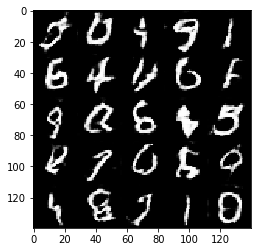

Epoch 2/2... Discriminator Loss: -0.9269... Generator Loss: 8.1618
Epoch 2/2... Discriminator Loss: -0.0898... Generator Loss: 3.2238
Epoch 2/2... Discriminator Loss: 4.5098... Generator Loss: 0.3418
Epoch 2/2... Discriminator Loss: 1.4004... Generator Loss: 0.8057
Epoch 2/2... Discriminator Loss: 0.1560... Generator Loss: 3.9537
Epoch 2/2... Discriminator Loss: 2.0996... Generator Loss: 1.2927
Epoch 2/2... Discriminator Loss: 1.7538... Generator Loss: 1.2492
Epoch 2/2... Discriminator Loss: 2.2733... Generator Loss: 1.3575
Epoch 2/2... Discriminator Loss: -0.4881... Generator Loss: 1.9395
Epoch 2/2... Discriminator Loss: 6.6259... Generator Loss: 0.2980


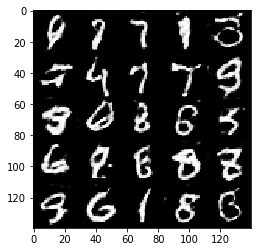

Epoch 2/2... Discriminator Loss: 7.4176... Generator Loss: 0.0280
Epoch 2/2... Discriminator Loss: -0.9934... Generator Loss: 14.6359
Epoch 2/2... Discriminator Loss: -0.5555... Generator Loss: 5.1614
Epoch 2/2... Discriminator Loss: 3.5241... Generator Loss: 0.6902
Epoch 2/2... Discriminator Loss: 0.8578... Generator Loss: 2.4699
Epoch 2/2... Discriminator Loss: 1.0639... Generator Loss: 1.7972
Epoch 2/2... Discriminator Loss: 1.9663... Generator Loss: 1.2540
Epoch 2/2... Discriminator Loss: 4.6797... Generator Loss: 0.6630
Epoch 2/2... Discriminator Loss: 2.0097... Generator Loss: 0.6587
Epoch 2/2... Discriminator Loss: -1.4394... Generator Loss: 7.3558


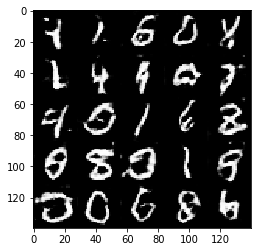

Epoch 2/2... Discriminator Loss: -0.4939... Generator Loss: 6.5707
Epoch 2/2... Discriminator Loss: -0.1183... Generator Loss: 13.4180
Epoch 2/2... Discriminator Loss: 4.1507... Generator Loss: 0.2159
Epoch 2/2... Discriminator Loss: 0.0445... Generator Loss: 1.7251
Epoch 2/2... Discriminator Loss: 0.4254... Generator Loss: 12.9888
Epoch 2/2... Discriminator Loss: 0.6209... Generator Loss: 2.2060
Epoch 2/2... Discriminator Loss: 0.8168... Generator Loss: 2.8042
Epoch 2/2... Discriminator Loss: -0.0009... Generator Loss: 4.1556
Epoch 2/2... Discriminator Loss: 0.0369... Generator Loss: 5.9839
Epoch 2/2... Discriminator Loss: 2.7882... Generator Loss: 0.5842


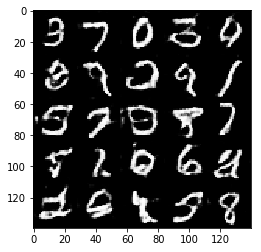

Epoch 2/2... Discriminator Loss: 0.9005... Generator Loss: 1.6723
Epoch 2/2... Discriminator Loss: 4.2806... Generator Loss: 1.1893
Epoch 2/2... Discriminator Loss: 4.4734... Generator Loss: 0.4349
Epoch 2/2... Discriminator Loss: 2.2697... Generator Loss: 0.8865
Epoch 2/2... Discriminator Loss: 3.6456... Generator Loss: 0.3124
Epoch 2/2... Discriminator Loss: 2.8191... Generator Loss: 0.4828
Epoch 2/2... Discriminator Loss: 2.1208... Generator Loss: 1.6816
Epoch 2/2... Discriminator Loss: 2.6808... Generator Loss: 0.6697
Epoch 2/2... Discriminator Loss: 3.2127... Generator Loss: 0.6291
Epoch 2/2... Discriminator Loss: 1.3423... Generator Loss: 2.7560


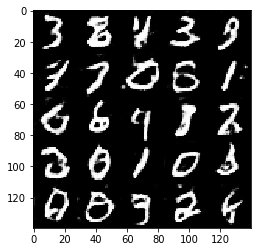

Epoch 2/2... Discriminator Loss: 2.0823... Generator Loss: 29.6963
Epoch 2/2... Discriminator Loss: 0.9515... Generator Loss: 3.3206
Epoch 2/2... Discriminator Loss: 2.6323... Generator Loss: 0.8550
Epoch 2/2... Discriminator Loss: 4.5271... Generator Loss: 0.5365
Epoch 2/2... Discriminator Loss: 5.4556... Generator Loss: 0.1633
Epoch 2/2... Discriminator Loss: 1.6069... Generator Loss: 1.2604
Epoch 2/2... Discriminator Loss: 0.5368... Generator Loss: 2.3265
Epoch 2/2... Discriminator Loss: -1.1894... Generator Loss: 4.0638
Epoch 2/2... Discriminator Loss: 3.2093... Generator Loss: 0.3286
Epoch 2/2... Discriminator Loss: -1.3273... Generator Loss: 5.5934


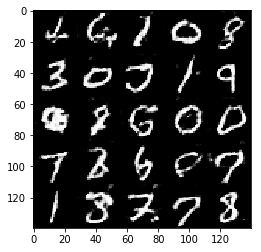

Epoch 2/2... Discriminator Loss: -0.8473... Generator Loss: 21.4564
Epoch 2/2... Discriminator Loss: 0.3904... Generator Loss: 1.9245
Epoch 2/2... Discriminator Loss: 7.1337... Generator Loss: 0.3565
Epoch 2/2... Discriminator Loss: -0.8629... Generator Loss: 4.4299
Epoch 2/2... Discriminator Loss: -1.4337... Generator Loss: 3.1040
Epoch 2/2... Discriminator Loss: 5.5107... Generator Loss: 0.7446
Epoch 2/2... Discriminator Loss: 3.8963... Generator Loss: 0.9687
Epoch 2/2... Discriminator Loss: 5.6397... Generator Loss: 0.1667
Epoch 2/2... Discriminator Loss: -1.4242... Generator Loss: 5.7479
Epoch 2/2... Discriminator Loss: -0.7276... Generator Loss: 3.1303


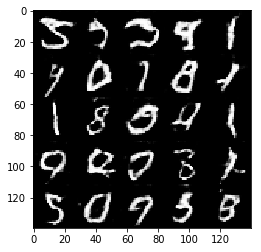

In [12]:
batch_size = 25
z_dim = 120
learning_rate = 0.0005
beta1 = 0.2


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.6989... Generator Loss: 0.4657
Epoch 1/1... Discriminator Loss: 2.1728... Generator Loss: 0.3647
Epoch 1/1... Discriminator Loss: 2.5317... Generator Loss: 0.2216
Epoch 1/1... Discriminator Loss: 0.4824... Generator Loss: 2.6502
Epoch 1/1... Discriminator Loss: 1.7363... Generator Loss: 0.4435
Epoch 1/1... Discriminator Loss: 1.6891... Generator Loss: 5.1831
Epoch 1/1... Discriminator Loss: 0.6388... Generator Loss: 1.9724
Epoch 1/1... Discriminator Loss: 1.3089... Generator Loss: 3.7172
Epoch 1/1... Discriminator Loss: 0.7947... Generator Loss: 1.2463
Epoch 1/1... Discriminator Loss: 0.7759... Generator Loss: 1.3698


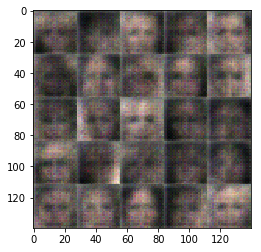

Epoch 1/1... Discriminator Loss: 0.5894... Generator Loss: 1.8080
Epoch 1/1... Discriminator Loss: 0.7067... Generator Loss: 1.5138
Epoch 1/1... Discriminator Loss: 1.5182... Generator Loss: 0.4171
Epoch 1/1... Discriminator Loss: 1.5185... Generator Loss: 0.4440
Epoch 1/1... Discriminator Loss: 1.0434... Generator Loss: 0.8583
Epoch 1/1... Discriminator Loss: 1.1217... Generator Loss: 0.9761
Epoch 1/1... Discriminator Loss: 1.1751... Generator Loss: 0.8220
Epoch 1/1... Discriminator Loss: 1.2050... Generator Loss: 0.9795
Epoch 1/1... Discriminator Loss: 1.0728... Generator Loss: 1.5406
Epoch 1/1... Discriminator Loss: 1.0111... Generator Loss: 2.2899


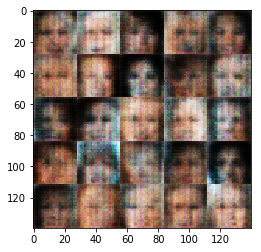

Epoch 1/1... Discriminator Loss: 1.2912... Generator Loss: 0.7091
Epoch 1/1... Discriminator Loss: 1.7323... Generator Loss: 0.3449
Epoch 1/1... Discriminator Loss: 1.7647... Generator Loss: 0.3049
Epoch 1/1... Discriminator Loss: 1.1767... Generator Loss: 0.6665
Epoch 1/1... Discriminator Loss: 0.9021... Generator Loss: 1.9447
Epoch 1/1... Discriminator Loss: 0.8892... Generator Loss: 1.1596
Epoch 1/1... Discriminator Loss: 1.7134... Generator Loss: 0.3749
Epoch 1/1... Discriminator Loss: 0.9791... Generator Loss: 2.2808
Epoch 1/1... Discriminator Loss: 0.6737... Generator Loss: 1.9642
Epoch 1/1... Discriminator Loss: 0.8318... Generator Loss: 1.1310


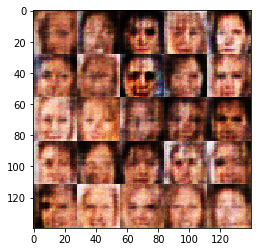

Epoch 1/1... Discriminator Loss: 1.0688... Generator Loss: 0.7810
Epoch 1/1... Discriminator Loss: 1.0964... Generator Loss: 0.9253
Epoch 1/1... Discriminator Loss: 1.2127... Generator Loss: 0.8197
Epoch 1/1... Discriminator Loss: 1.1603... Generator Loss: 0.9046
Epoch 1/1... Discriminator Loss: 1.9955... Generator Loss: 2.6683
Epoch 1/1... Discriminator Loss: 1.1827... Generator Loss: 2.3915
Epoch 1/1... Discriminator Loss: 0.8655... Generator Loss: 1.7259
Epoch 1/1... Discriminator Loss: 1.4682... Generator Loss: 0.4786
Epoch 1/1... Discriminator Loss: 1.1150... Generator Loss: 2.1347
Epoch 1/1... Discriminator Loss: 1.5604... Generator Loss: 2.0831


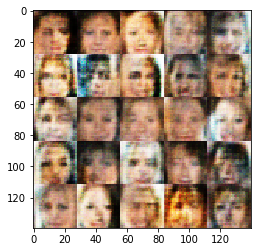

Epoch 1/1... Discriminator Loss: 1.1946... Generator Loss: 1.8141
Epoch 1/1... Discriminator Loss: 0.9969... Generator Loss: 1.3141
Epoch 1/1... Discriminator Loss: 1.4685... Generator Loss: 3.0751
Epoch 1/1... Discriminator Loss: 1.5083... Generator Loss: 0.4188
Epoch 1/1... Discriminator Loss: 0.9637... Generator Loss: 0.9108
Epoch 1/1... Discriminator Loss: 1.2736... Generator Loss: 1.3643
Epoch 1/1... Discriminator Loss: 1.1383... Generator Loss: 1.2800
Epoch 1/1... Discriminator Loss: 1.3970... Generator Loss: 0.4681
Epoch 1/1... Discriminator Loss: 1.2495... Generator Loss: 0.5854
Epoch 1/1... Discriminator Loss: 0.9953... Generator Loss: 1.6706


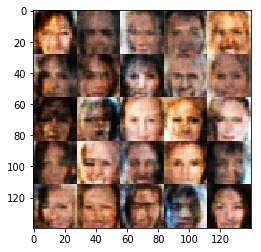

Epoch 1/1... Discriminator Loss: 1.0611... Generator Loss: 0.7319
Epoch 1/1... Discriminator Loss: 1.1851... Generator Loss: 0.7092
Epoch 1/1... Discriminator Loss: 1.1686... Generator Loss: 1.0642
Epoch 1/1... Discriminator Loss: 1.7340... Generator Loss: 0.3521
Epoch 1/1... Discriminator Loss: 1.2059... Generator Loss: 0.6093
Epoch 1/1... Discriminator Loss: 1.2010... Generator Loss: 0.6263
Epoch 1/1... Discriminator Loss: 1.3495... Generator Loss: 0.4970
Epoch 1/1... Discriminator Loss: 1.2953... Generator Loss: 0.5803
Epoch 1/1... Discriminator Loss: 1.6177... Generator Loss: 0.3428
Epoch 1/1... Discriminator Loss: 0.9096... Generator Loss: 1.5238


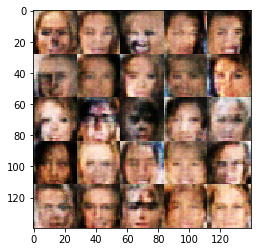

Epoch 1/1... Discriminator Loss: 0.9749... Generator Loss: 1.1224
Epoch 1/1... Discriminator Loss: 1.8898... Generator Loss: 2.7243
Epoch 1/1... Discriminator Loss: 1.1464... Generator Loss: 1.0622
Epoch 1/1... Discriminator Loss: 1.0167... Generator Loss: 1.2807
Epoch 1/1... Discriminator Loss: 1.3244... Generator Loss: 1.6794
Epoch 1/1... Discriminator Loss: 1.8370... Generator Loss: 0.2936
Epoch 1/1... Discriminator Loss: 0.9095... Generator Loss: 2.0007
Epoch 1/1... Discriminator Loss: 1.1821... Generator Loss: 0.7435
Epoch 1/1... Discriminator Loss: 0.9920... Generator Loss: 0.9089
Epoch 1/1... Discriminator Loss: 1.1997... Generator Loss: 0.6629


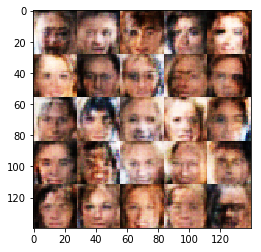

Epoch 1/1... Discriminator Loss: 2.1030... Generator Loss: 0.2144
Epoch 1/1... Discriminator Loss: 0.9804... Generator Loss: 1.0637
Epoch 1/1... Discriminator Loss: 1.6327... Generator Loss: 0.3428
Epoch 1/1... Discriminator Loss: 1.4876... Generator Loss: 0.4250
Epoch 1/1... Discriminator Loss: 0.8983... Generator Loss: 0.9376
Epoch 1/1... Discriminator Loss: 3.1206... Generator Loss: 4.3477
Epoch 1/1... Discriminator Loss: 1.0975... Generator Loss: 1.0614
Epoch 1/1... Discriminator Loss: 1.1539... Generator Loss: 0.7413
Epoch 1/1... Discriminator Loss: 1.5798... Generator Loss: 0.3854
Epoch 1/1... Discriminator Loss: 1.3406... Generator Loss: 0.5178


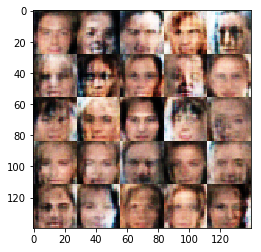

Epoch 1/1... Discriminator Loss: 1.7737... Generator Loss: 0.3200
Epoch 1/1... Discriminator Loss: 1.2390... Generator Loss: 1.7992
Epoch 1/1... Discriminator Loss: 1.5906... Generator Loss: 0.3674
Epoch 1/1... Discriminator Loss: 0.8934... Generator Loss: 1.3889
Epoch 1/1... Discriminator Loss: 1.4382... Generator Loss: 0.4603
Epoch 1/1... Discriminator Loss: 1.4538... Generator Loss: 0.5050
Epoch 1/1... Discriminator Loss: 1.1535... Generator Loss: 0.7151
Epoch 1/1... Discriminator Loss: 2.1439... Generator Loss: 0.2200
Epoch 1/1... Discriminator Loss: 1.5646... Generator Loss: 2.6487
Epoch 1/1... Discriminator Loss: 1.1251... Generator Loss: 0.9115


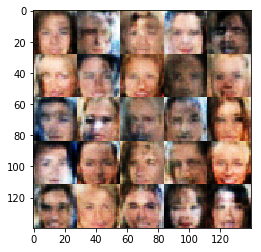

Epoch 1/1... Discriminator Loss: 1.0446... Generator Loss: 1.0939
Epoch 1/1... Discriminator Loss: 2.1990... Generator Loss: 2.1767
Epoch 1/1... Discriminator Loss: 1.3462... Generator Loss: 0.4938
Epoch 1/1... Discriminator Loss: 0.7025... Generator Loss: 1.5095
Epoch 1/1... Discriminator Loss: 0.9617... Generator Loss: 1.9347
Epoch 1/1... Discriminator Loss: 1.3308... Generator Loss: 0.4875
Epoch 1/1... Discriminator Loss: 0.8742... Generator Loss: 1.0948
Epoch 1/1... Discriminator Loss: 1.2039... Generator Loss: 1.9542
Epoch 1/1... Discriminator Loss: 2.0541... Generator Loss: 2.7326
Epoch 1/1... Discriminator Loss: 1.6081... Generator Loss: 0.3992


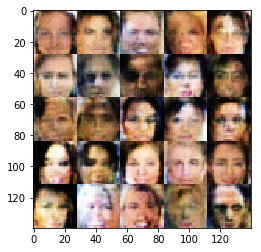

Epoch 1/1... Discriminator Loss: 2.4014... Generator Loss: 0.1615
Epoch 1/1... Discriminator Loss: 1.3114... Generator Loss: 0.5511
Epoch 1/1... Discriminator Loss: 1.5835... Generator Loss: 0.3886
Epoch 1/1... Discriminator Loss: 1.4288... Generator Loss: 0.4656
Epoch 1/1... Discriminator Loss: 1.1966... Generator Loss: 0.7166
Epoch 1/1... Discriminator Loss: 1.6273... Generator Loss: 0.3876
Epoch 1/1... Discriminator Loss: 0.8540... Generator Loss: 1.0189
Epoch 1/1... Discriminator Loss: 2.4224... Generator Loss: 0.1647
Epoch 1/1... Discriminator Loss: 0.8959... Generator Loss: 1.2412
Epoch 1/1... Discriminator Loss: 1.2089... Generator Loss: 0.6234


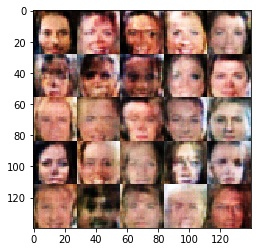

Epoch 1/1... Discriminator Loss: 1.5094... Generator Loss: 0.4899
Epoch 1/1... Discriminator Loss: 1.2218... Generator Loss: 2.2340
Epoch 1/1... Discriminator Loss: 1.1596... Generator Loss: 0.6400
Epoch 1/1... Discriminator Loss: 0.6827... Generator Loss: 2.3266
Epoch 1/1... Discriminator Loss: 1.3438... Generator Loss: 1.9382
Epoch 1/1... Discriminator Loss: 0.9813... Generator Loss: 1.8487
Epoch 1/1... Discriminator Loss: 1.4272... Generator Loss: 3.1781
Epoch 1/1... Discriminator Loss: 1.5995... Generator Loss: 0.3773
Epoch 1/1... Discriminator Loss: 0.8465... Generator Loss: 1.0974
Epoch 1/1... Discriminator Loss: 1.7137... Generator Loss: 0.3311


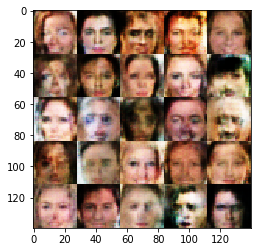

Epoch 1/1... Discriminator Loss: 1.0738... Generator Loss: 0.7314
Epoch 1/1... Discriminator Loss: 0.7112... Generator Loss: 1.2576
Epoch 1/1... Discriminator Loss: 1.0961... Generator Loss: 0.7190
Epoch 1/1... Discriminator Loss: 1.1136... Generator Loss: 0.8724
Epoch 1/1... Discriminator Loss: 1.0327... Generator Loss: 0.7479
Epoch 1/1... Discriminator Loss: 0.9727... Generator Loss: 1.1978
Epoch 1/1... Discriminator Loss: 1.3882... Generator Loss: 0.4599
Epoch 1/1... Discriminator Loss: 0.8991... Generator Loss: 1.0450
Epoch 1/1... Discriminator Loss: 1.0051... Generator Loss: 1.1415
Epoch 1/1... Discriminator Loss: 0.6195... Generator Loss: 1.8226


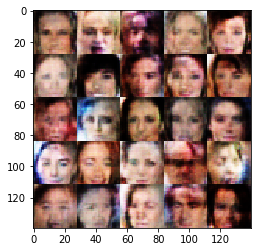

Epoch 1/1... Discriminator Loss: 1.5890... Generator Loss: 0.4031
Epoch 1/1... Discriminator Loss: 1.5331... Generator Loss: 0.3964
Epoch 1/1... Discriminator Loss: 0.9783... Generator Loss: 1.2631
Epoch 1/1... Discriminator Loss: 1.2679... Generator Loss: 0.5667
Epoch 1/1... Discriminator Loss: 1.3883... Generator Loss: 0.4856
Epoch 1/1... Discriminator Loss: 1.1426... Generator Loss: 0.9020
Epoch 1/1... Discriminator Loss: 1.1615... Generator Loss: 0.6369
Epoch 1/1... Discriminator Loss: 0.6496... Generator Loss: 1.5044
Epoch 1/1... Discriminator Loss: 0.9841... Generator Loss: 1.5186
Epoch 1/1... Discriminator Loss: 1.9485... Generator Loss: 0.2459


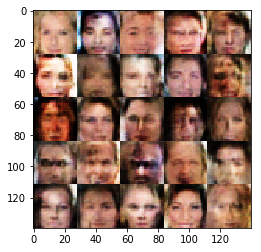

Epoch 1/1... Discriminator Loss: 0.9173... Generator Loss: 1.9313
Epoch 1/1... Discriminator Loss: 0.6511... Generator Loss: 1.5827
Epoch 1/1... Discriminator Loss: 0.8519... Generator Loss: 1.1956
Epoch 1/1... Discriminator Loss: 1.2170... Generator Loss: 2.6608
Epoch 1/1... Discriminator Loss: 1.1150... Generator Loss: 0.7270
Epoch 1/1... Discriminator Loss: 3.0408... Generator Loss: 4.4539
Epoch 1/1... Discriminator Loss: 0.9087... Generator Loss: 1.1832
Epoch 1/1... Discriminator Loss: 0.8854... Generator Loss: 1.0193
Epoch 1/1... Discriminator Loss: 0.8542... Generator Loss: 1.5202
Epoch 1/1... Discriminator Loss: 1.0247... Generator Loss: 1.6143


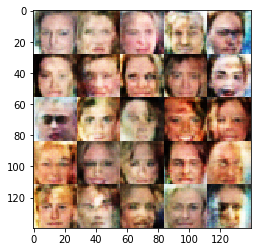

Epoch 1/1... Discriminator Loss: 0.9309... Generator Loss: 1.1517
Epoch 1/1... Discriminator Loss: 1.4205... Generator Loss: 2.7221
Epoch 1/1... Discriminator Loss: 0.6704... Generator Loss: 1.5275
Epoch 1/1... Discriminator Loss: 0.8320... Generator Loss: 3.1942
Epoch 1/1... Discriminator Loss: 1.2812... Generator Loss: 0.5599
Epoch 1/1... Discriminator Loss: 1.1484... Generator Loss: 0.6399
Epoch 1/1... Discriminator Loss: 1.1628... Generator Loss: 0.6407
Epoch 1/1... Discriminator Loss: 1.5836... Generator Loss: 0.3854
Epoch 1/1... Discriminator Loss: 2.0337... Generator Loss: 0.2257
Epoch 1/1... Discriminator Loss: 0.8408... Generator Loss: 1.1039


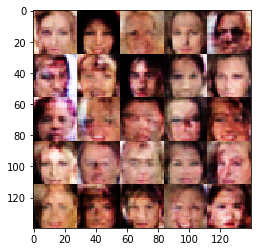

Epoch 1/1... Discriminator Loss: 1.8363... Generator Loss: 0.2690
Epoch 1/1... Discriminator Loss: 0.8740... Generator Loss: 1.4668
Epoch 1/1... Discriminator Loss: 1.7883... Generator Loss: 0.3330
Epoch 1/1... Discriminator Loss: 0.9182... Generator Loss: 0.8780
Epoch 1/1... Discriminator Loss: 0.8577... Generator Loss: 1.2397
Epoch 1/1... Discriminator Loss: 0.9821... Generator Loss: 0.8463
Epoch 1/1... Discriminator Loss: 0.8156... Generator Loss: 1.0752
Epoch 1/1... Discriminator Loss: 0.6391... Generator Loss: 1.5284
Epoch 1/1... Discriminator Loss: 2.1333... Generator Loss: 2.6567
Epoch 1/1... Discriminator Loss: 1.0402... Generator Loss: 1.0651


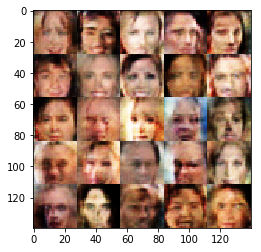

Epoch 1/1... Discriminator Loss: 0.7354... Generator Loss: 2.1302
Epoch 1/1... Discriminator Loss: 0.7616... Generator Loss: 1.6361
Epoch 1/1... Discriminator Loss: 1.1829... Generator Loss: 1.8910
Epoch 1/1... Discriminator Loss: 0.6591... Generator Loss: 1.7584
Epoch 1/1... Discriminator Loss: 1.4677... Generator Loss: 0.4459
Epoch 1/1... Discriminator Loss: 0.8312... Generator Loss: 1.4831
Epoch 1/1... Discriminator Loss: 1.2733... Generator Loss: 0.5529
Epoch 1/1... Discriminator Loss: 1.9832... Generator Loss: 0.2716
Epoch 1/1... Discriminator Loss: 0.7736... Generator Loss: 1.1087
Epoch 1/1... Discriminator Loss: 0.7652... Generator Loss: 1.2727


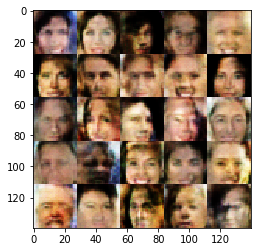

Epoch 1/1... Discriminator Loss: 1.7460... Generator Loss: 0.3596
Epoch 1/1... Discriminator Loss: 1.1918... Generator Loss: 0.6583
Epoch 1/1... Discriminator Loss: 1.2463... Generator Loss: 0.5902
Epoch 1/1... Discriminator Loss: 0.9592... Generator Loss: 1.8852
Epoch 1/1... Discriminator Loss: 1.1172... Generator Loss: 0.7821
Epoch 1/1... Discriminator Loss: 1.6988... Generator Loss: 0.3824
Epoch 1/1... Discriminator Loss: 0.6922... Generator Loss: 2.1303
Epoch 1/1... Discriminator Loss: 0.7074... Generator Loss: 1.2827
Epoch 1/1... Discriminator Loss: 1.3561... Generator Loss: 0.5288
Epoch 1/1... Discriminator Loss: 1.5452... Generator Loss: 0.4180


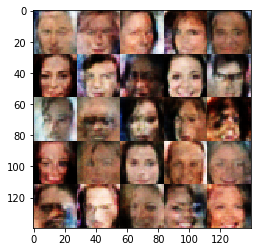

Epoch 1/1... Discriminator Loss: 0.9797... Generator Loss: 0.9211
Epoch 1/1... Discriminator Loss: 0.6411... Generator Loss: 1.5362
Epoch 1/1... Discriminator Loss: 0.9875... Generator Loss: 1.6836
Epoch 1/1... Discriminator Loss: 1.3934... Generator Loss: 0.5099
Epoch 1/1... Discriminator Loss: 0.7199... Generator Loss: 1.7976
Epoch 1/1... Discriminator Loss: 0.6198... Generator Loss: 1.6561
Epoch 1/1... Discriminator Loss: 1.0647... Generator Loss: 0.7499
Epoch 1/1... Discriminator Loss: 2.1508... Generator Loss: 0.2489
Epoch 1/1... Discriminator Loss: 1.5826... Generator Loss: 1.1855
Epoch 1/1... Discriminator Loss: 1.2961... Generator Loss: 0.5269


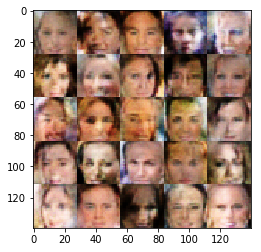

Epoch 1/1... Discriminator Loss: 0.7520... Generator Loss: 1.1975
Epoch 1/1... Discriminator Loss: 2.3612... Generator Loss: 0.2003
Epoch 1/1... Discriminator Loss: 1.3053... Generator Loss: 0.5273
Epoch 1/1... Discriminator Loss: 1.3128... Generator Loss: 0.5225
Epoch 1/1... Discriminator Loss: 0.6732... Generator Loss: 1.5836
Epoch 1/1... Discriminator Loss: 2.5952... Generator Loss: 0.1457
Epoch 1/1... Discriminator Loss: 0.7142... Generator Loss: 1.2823
Epoch 1/1... Discriminator Loss: 0.9188... Generator Loss: 0.8782
Epoch 1/1... Discriminator Loss: 1.5558... Generator Loss: 0.3931
Epoch 1/1... Discriminator Loss: 0.6225... Generator Loss: 2.3662


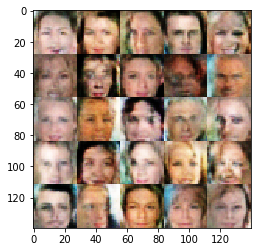

Epoch 1/1... Discriminator Loss: 1.4207... Generator Loss: 0.4594
Epoch 1/1... Discriminator Loss: 2.5310... Generator Loss: 0.1514
Epoch 1/1... Discriminator Loss: 0.8961... Generator Loss: 1.9710
Epoch 1/1... Discriminator Loss: 0.8191... Generator Loss: 1.0536
Epoch 1/1... Discriminator Loss: 2.1106... Generator Loss: 0.2010
Epoch 1/1... Discriminator Loss: 1.0012... Generator Loss: 0.7992
Epoch 1/1... Discriminator Loss: 0.6995... Generator Loss: 1.4395
Epoch 1/1... Discriminator Loss: 0.8183... Generator Loss: 1.0869
Epoch 1/1... Discriminator Loss: 1.0863... Generator Loss: 0.6932
Epoch 1/1... Discriminator Loss: 1.2098... Generator Loss: 0.6487


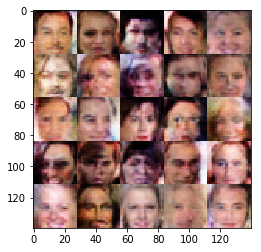

Epoch 1/1... Discriminator Loss: 1.7602... Generator Loss: 0.3789
Epoch 1/1... Discriminator Loss: 0.5965... Generator Loss: 1.5628
Epoch 1/1... Discriminator Loss: 0.9314... Generator Loss: 1.3723
Epoch 1/1... Discriminator Loss: 0.7235... Generator Loss: 1.3787
Epoch 1/1... Discriminator Loss: 0.7935... Generator Loss: 1.1009
Epoch 1/1... Discriminator Loss: 0.7725... Generator Loss: 1.2734
Epoch 1/1... Discriminator Loss: 1.0239... Generator Loss: 1.3698
Epoch 1/1... Discriminator Loss: 1.1338... Generator Loss: 0.7020
Epoch 1/1... Discriminator Loss: 1.2450... Generator Loss: 0.5641
Epoch 1/1... Discriminator Loss: 1.2815... Generator Loss: 0.5857


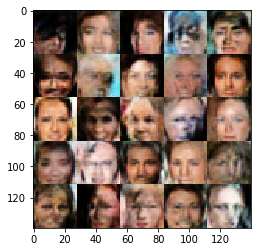

Epoch 1/1... Discriminator Loss: 1.1301... Generator Loss: 0.6717
Epoch 1/1... Discriminator Loss: 0.9189... Generator Loss: 0.9947
Epoch 1/1... Discriminator Loss: 2.2248... Generator Loss: 0.2213
Epoch 1/1... Discriminator Loss: 1.8197... Generator Loss: 0.3122
Epoch 1/1... Discriminator Loss: 0.7898... Generator Loss: 1.3608
Epoch 1/1... Discriminator Loss: 1.0671... Generator Loss: 0.7154
Epoch 1/1... Discriminator Loss: 0.9488... Generator Loss: 0.9405
Epoch 1/1... Discriminator Loss: 0.8225... Generator Loss: 1.1023
Epoch 1/1... Discriminator Loss: 1.1418... Generator Loss: 2.1723
Epoch 1/1... Discriminator Loss: 1.3339... Generator Loss: 0.5132


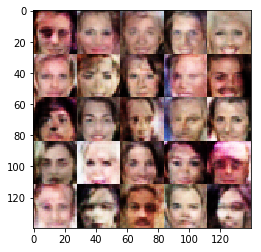

Epoch 1/1... Discriminator Loss: 1.0901... Generator Loss: 0.7429
Epoch 1/1... Discriminator Loss: 0.9641... Generator Loss: 1.0561
Epoch 1/1... Discriminator Loss: 0.8237... Generator Loss: 2.0355
Epoch 1/1... Discriminator Loss: 1.2364... Generator Loss: 0.6127
Epoch 1/1... Discriminator Loss: 1.0916... Generator Loss: 0.7586
Epoch 1/1... Discriminator Loss: 1.5628... Generator Loss: 2.0994
Epoch 1/1... Discriminator Loss: 1.0633... Generator Loss: 0.7580
Epoch 1/1... Discriminator Loss: 1.2292... Generator Loss: 0.6085
Epoch 1/1... Discriminator Loss: 1.9611... Generator Loss: 0.3023
Epoch 1/1... Discriminator Loss: 0.9714... Generator Loss: 0.8140


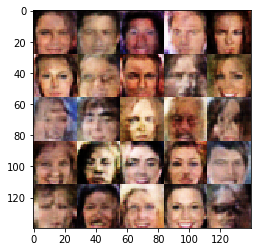

Epoch 1/1... Discriminator Loss: 0.9806... Generator Loss: 1.5091
Epoch 1/1... Discriminator Loss: 1.8063... Generator Loss: 0.3018
Epoch 1/1... Discriminator Loss: 1.6343... Generator Loss: 0.3788
Epoch 1/1... Discriminator Loss: 0.9854... Generator Loss: 0.8401
Epoch 1/1... Discriminator Loss: 1.2261... Generator Loss: 3.3106
Epoch 1/1... Discriminator Loss: 1.3970... Generator Loss: 0.4972
Epoch 1/1... Discriminator Loss: 2.0181... Generator Loss: 0.2496
Epoch 1/1... Discriminator Loss: 0.8393... Generator Loss: 1.7721
Epoch 1/1... Discriminator Loss: 1.1164... Generator Loss: 0.8001
Epoch 1/1... Discriminator Loss: 2.1897... Generator Loss: 0.1882


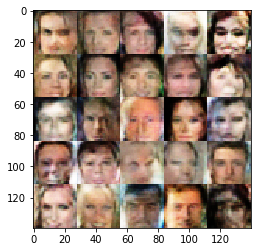

Epoch 1/1... Discriminator Loss: 0.9189... Generator Loss: 1.8633
Epoch 1/1... Discriminator Loss: 0.8947... Generator Loss: 0.9372
Epoch 1/1... Discriminator Loss: 1.0517... Generator Loss: 2.8007
Epoch 1/1... Discriminator Loss: 0.7399... Generator Loss: 1.3159
Epoch 1/1... Discriminator Loss: 1.5422... Generator Loss: 0.3850
Epoch 1/1... Discriminator Loss: 1.4004... Generator Loss: 0.4895
Epoch 1/1... Discriminator Loss: 0.6974... Generator Loss: 1.7738
Epoch 1/1... Discriminator Loss: 0.8937... Generator Loss: 1.9794
Epoch 1/1... Discriminator Loss: 1.4382... Generator Loss: 0.4865
Epoch 1/1... Discriminator Loss: 0.9210... Generator Loss: 0.9503


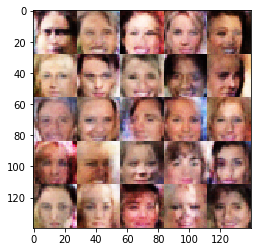

Epoch 1/1... Discriminator Loss: 1.3402... Generator Loss: 0.5053
Epoch 1/1... Discriminator Loss: 0.9904... Generator Loss: 0.8464
Epoch 1/1... Discriminator Loss: 1.0273... Generator Loss: 0.9774
Epoch 1/1... Discriminator Loss: 1.8174... Generator Loss: 0.2977
Epoch 1/1... Discriminator Loss: 1.3210... Generator Loss: 0.5623
Epoch 1/1... Discriminator Loss: 0.7267... Generator Loss: 1.2401
Epoch 1/1... Discriminator Loss: 1.3230... Generator Loss: 0.5799
Epoch 1/1... Discriminator Loss: 1.5432... Generator Loss: 0.3963
Epoch 1/1... Discriminator Loss: 0.8224... Generator Loss: 1.3669
Epoch 1/1... Discriminator Loss: 0.6706... Generator Loss: 2.0990


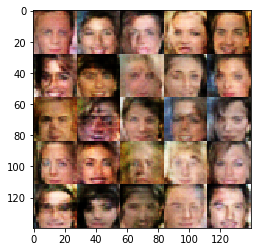

Epoch 1/1... Discriminator Loss: 1.1813... Generator Loss: 0.7730
Epoch 1/1... Discriminator Loss: 0.7110... Generator Loss: 1.5351
Epoch 1/1... Discriminator Loss: 0.7943... Generator Loss: 1.8847
Epoch 1/1... Discriminator Loss: 0.9462... Generator Loss: 1.1796
Epoch 1/1... Discriminator Loss: 1.1536... Generator Loss: 0.6821
Epoch 1/1... Discriminator Loss: 1.1084... Generator Loss: 0.7153
Epoch 1/1... Discriminator Loss: 1.5602... Generator Loss: 0.4667
Epoch 1/1... Discriminator Loss: 1.0571... Generator Loss: 0.8481
Epoch 1/1... Discriminator Loss: 1.8896... Generator Loss: 0.2698
Epoch 1/1... Discriminator Loss: 1.3367... Generator Loss: 0.5859


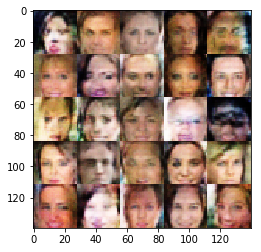

Epoch 1/1... Discriminator Loss: 1.0225... Generator Loss: 1.5916
Epoch 1/1... Discriminator Loss: 1.1970... Generator Loss: 0.6187
Epoch 1/1... Discriminator Loss: 0.9517... Generator Loss: 1.1335
Epoch 1/1... Discriminator Loss: 1.9159... Generator Loss: 0.2721
Epoch 1/1... Discriminator Loss: 0.9201... Generator Loss: 0.9253
Epoch 1/1... Discriminator Loss: 1.4785... Generator Loss: 0.4350
Epoch 1/1... Discriminator Loss: 0.8403... Generator Loss: 1.0299
Epoch 1/1... Discriminator Loss: 0.7160... Generator Loss: 1.3596
Epoch 1/1... Discriminator Loss: 1.1071... Generator Loss: 2.2966
Epoch 1/1... Discriminator Loss: 1.6507... Generator Loss: 0.3829


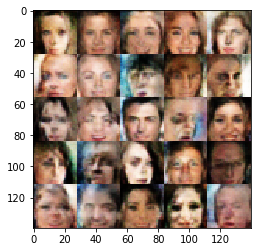

Epoch 1/1... Discriminator Loss: 1.2107... Generator Loss: 0.6056
Epoch 1/1... Discriminator Loss: 1.7684... Generator Loss: 0.3530
Epoch 1/1... Discriminator Loss: 0.9556... Generator Loss: 0.8918
Epoch 1/1... Discriminator Loss: 0.7757... Generator Loss: 1.4837
Epoch 1/1... Discriminator Loss: 1.7582... Generator Loss: 0.3322
Epoch 1/1... Discriminator Loss: 0.8109... Generator Loss: 1.1121
Epoch 1/1... Discriminator Loss: 0.8371... Generator Loss: 1.1543
Epoch 1/1... Discriminator Loss: 0.8767... Generator Loss: 1.4495
Epoch 1/1... Discriminator Loss: 0.9185... Generator Loss: 2.4074
Epoch 1/1... Discriminator Loss: 0.7188... Generator Loss: 1.8099


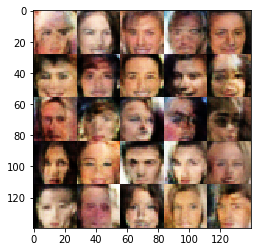

Epoch 1/1... Discriminator Loss: 2.0386... Generator Loss: 0.2376
Epoch 1/1... Discriminator Loss: 1.0082... Generator Loss: 0.7590
Epoch 1/1... Discriminator Loss: 1.0409... Generator Loss: 0.8690
Epoch 1/1... Discriminator Loss: 0.9191... Generator Loss: 1.3401
Epoch 1/1... Discriminator Loss: 1.1416... Generator Loss: 1.4012
Epoch 1/1... Discriminator Loss: 0.8450... Generator Loss: 1.0766
Epoch 1/1... Discriminator Loss: 1.3078... Generator Loss: 0.5307
Epoch 1/1... Discriminator Loss: 1.1435... Generator Loss: 0.6626
Epoch 1/1... Discriminator Loss: 2.3748... Generator Loss: 0.1846
Epoch 1/1... Discriminator Loss: 0.9715... Generator Loss: 2.2413


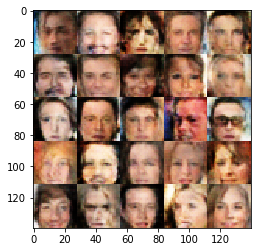

Epoch 1/1... Discriminator Loss: 1.5653... Generator Loss: 0.3892
Epoch 1/1... Discriminator Loss: 0.8153... Generator Loss: 1.2828
Epoch 1/1... Discriminator Loss: 0.8665... Generator Loss: 0.9870
Epoch 1/1... Discriminator Loss: 1.4605... Generator Loss: 0.4416
Epoch 1/1... Discriminator Loss: 1.9260... Generator Loss: 0.2732
Epoch 1/1... Discriminator Loss: 1.9576... Generator Loss: 0.3215
Epoch 1/1... Discriminator Loss: 1.8763... Generator Loss: 0.2860
Epoch 1/1... Discriminator Loss: 1.5853... Generator Loss: 0.4045
Epoch 1/1... Discriminator Loss: 1.5439... Generator Loss: 0.4227
Epoch 1/1... Discriminator Loss: 1.1178... Generator Loss: 0.6765


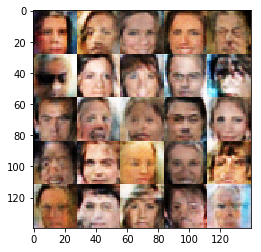

Epoch 1/1... Discriminator Loss: 1.1115... Generator Loss: 0.7928
Epoch 1/1... Discriminator Loss: 0.9423... Generator Loss: 0.9138
Epoch 1/1... Discriminator Loss: 0.9918... Generator Loss: 0.8379
Epoch 1/1... Discriminator Loss: 1.2794... Generator Loss: 0.5571
Epoch 1/1... Discriminator Loss: 1.1493... Generator Loss: 1.7600
Epoch 1/1... Discriminator Loss: 0.8663... Generator Loss: 1.2822
Epoch 1/1... Discriminator Loss: 0.9887... Generator Loss: 0.8033
Epoch 1/1... Discriminator Loss: 2.0653... Generator Loss: 0.2483
Epoch 1/1... Discriminator Loss: 1.3738... Generator Loss: 0.4657
Epoch 1/1... Discriminator Loss: 0.9438... Generator Loss: 1.9891


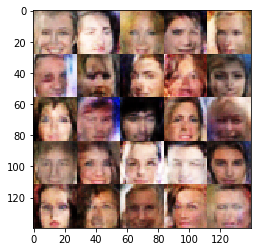

Epoch 1/1... Discriminator Loss: 1.6792... Generator Loss: 0.3244
Epoch 1/1... Discriminator Loss: 1.1665... Generator Loss: 1.1183
Epoch 1/1... Discriminator Loss: 1.5847... Generator Loss: 0.3931
Epoch 1/1... Discriminator Loss: 1.0237... Generator Loss: 0.8392
Epoch 1/1... Discriminator Loss: 0.7947... Generator Loss: 1.9239
Epoch 1/1... Discriminator Loss: 0.9071... Generator Loss: 0.9830
Epoch 1/1... Discriminator Loss: 1.3437... Generator Loss: 1.8623
Epoch 1/1... Discriminator Loss: 1.0936... Generator Loss: 0.7942
Epoch 1/1... Discriminator Loss: 0.9575... Generator Loss: 0.9647
Epoch 1/1... Discriminator Loss: 2.3961... Generator Loss: 0.1908


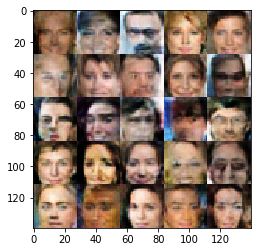

Epoch 1/1... Discriminator Loss: 1.1883... Generator Loss: 0.6433
Epoch 1/1... Discriminator Loss: 0.9042... Generator Loss: 0.9388
Epoch 1/1... Discriminator Loss: 1.2381... Generator Loss: 0.5918
Epoch 1/1... Discriminator Loss: 1.6255... Generator Loss: 0.3852
Epoch 1/1... Discriminator Loss: 0.9731... Generator Loss: 0.8654
Epoch 1/1... Discriminator Loss: 1.1449... Generator Loss: 1.8102
Epoch 1/1... Discriminator Loss: 1.1679... Generator Loss: 0.6591
Epoch 1/1... Discriminator Loss: 1.4175... Generator Loss: 0.4644
Epoch 1/1... Discriminator Loss: 0.6155... Generator Loss: 1.5671
Epoch 1/1... Discriminator Loss: 0.8601... Generator Loss: 1.4561


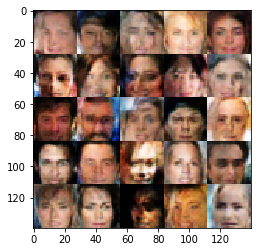

Epoch 1/1... Discriminator Loss: 2.0918... Generator Loss: 0.2070
Epoch 1/1... Discriminator Loss: 0.9223... Generator Loss: 0.9144
Epoch 1/1... Discriminator Loss: 2.5013... Generator Loss: 0.1547
Epoch 1/1... Discriminator Loss: 0.9152... Generator Loss: 0.9150
Epoch 1/1... Discriminator Loss: 1.4298... Generator Loss: 0.4395
Epoch 1/1... Discriminator Loss: 1.0694... Generator Loss: 0.7932
Epoch 1/1... Discriminator Loss: 1.4096... Generator Loss: 0.4680
Epoch 1/1... Discriminator Loss: 0.8315... Generator Loss: 1.2125
Epoch 1/1... Discriminator Loss: 0.9960... Generator Loss: 0.8189
Epoch 1/1... Discriminator Loss: 1.2770... Generator Loss: 0.5749


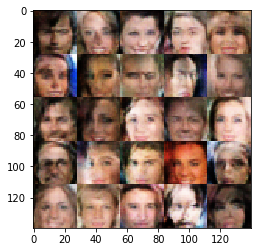

Epoch 1/1... Discriminator Loss: 0.9036... Generator Loss: 1.5905
Epoch 1/1... Discriminator Loss: 1.0886... Generator Loss: 0.7239
Epoch 1/1... Discriminator Loss: 1.4007... Generator Loss: 0.4752
Epoch 1/1... Discriminator Loss: 1.2189... Generator Loss: 0.6073
Epoch 1/1... Discriminator Loss: 1.1732... Generator Loss: 0.6632
Epoch 1/1... Discriminator Loss: 1.2735... Generator Loss: 0.5519
Epoch 1/1... Discriminator Loss: 1.3658... Generator Loss: 0.4880
Epoch 1/1... Discriminator Loss: 0.7223... Generator Loss: 1.4532
Epoch 1/1... Discriminator Loss: 1.5845... Generator Loss: 0.3688
Epoch 1/1... Discriminator Loss: 1.8829... Generator Loss: 0.2817


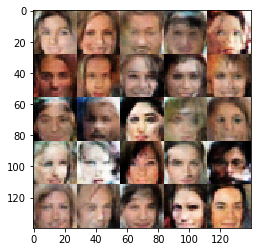

Epoch 1/1... Discriminator Loss: 0.7528... Generator Loss: 1.1898
Epoch 1/1... Discriminator Loss: 0.9934... Generator Loss: 0.8578
Epoch 1/1... Discriminator Loss: 1.0273... Generator Loss: 0.7448
Epoch 1/1... Discriminator Loss: 1.1891... Generator Loss: 0.7157
Epoch 1/1... Discriminator Loss: 1.0935... Generator Loss: 1.3992
Epoch 1/1... Discriminator Loss: 1.0758... Generator Loss: 0.7409
Epoch 1/1... Discriminator Loss: 1.4059... Generator Loss: 0.4754
Epoch 1/1... Discriminator Loss: 1.9107... Generator Loss: 0.2753
Epoch 1/1... Discriminator Loss: 0.8535... Generator Loss: 2.6165
Epoch 1/1... Discriminator Loss: 1.3235... Generator Loss: 0.5085


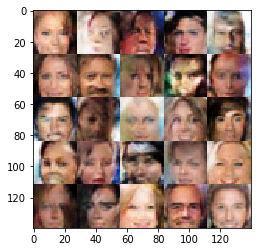

Epoch 1/1... Discriminator Loss: 1.0002... Generator Loss: 0.8163
Epoch 1/1... Discriminator Loss: 0.9759... Generator Loss: 0.8064
Epoch 1/1... Discriminator Loss: 1.0076... Generator Loss: 0.8824
Epoch 1/1... Discriminator Loss: 0.8739... Generator Loss: 1.0338
Epoch 1/1... Discriminator Loss: 1.5690... Generator Loss: 3.3249
Epoch 1/1... Discriminator Loss: 2.2654... Generator Loss: 0.1792
Epoch 1/1... Discriminator Loss: 0.9661... Generator Loss: 1.0677
Epoch 1/1... Discriminator Loss: 1.2380... Generator Loss: 0.5952
Epoch 1/1... Discriminator Loss: 0.9224... Generator Loss: 0.8833
Epoch 1/1... Discriminator Loss: 0.9153... Generator Loss: 1.3176


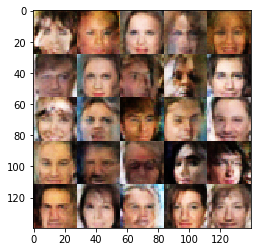

Epoch 1/1... Discriminator Loss: 1.3624... Generator Loss: 0.5295
Epoch 1/1... Discriminator Loss: 0.9659... Generator Loss: 0.8854
Epoch 1/1... Discriminator Loss: 0.9624... Generator Loss: 0.8715
Epoch 1/1... Discriminator Loss: 1.5499... Generator Loss: 0.3998
Epoch 1/1... Discriminator Loss: 1.0951... Generator Loss: 0.6762
Epoch 1/1... Discriminator Loss: 0.8788... Generator Loss: 1.2628
Epoch 1/1... Discriminator Loss: 0.9398... Generator Loss: 1.0481
Epoch 1/1... Discriminator Loss: 1.2758... Generator Loss: 0.5769
Epoch 1/1... Discriminator Loss: 1.2517... Generator Loss: 0.5613
Epoch 1/1... Discriminator Loss: 1.0190... Generator Loss: 1.2041


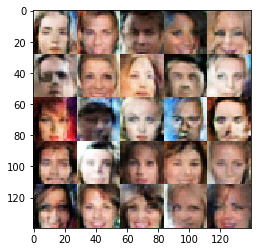

Epoch 1/1... Discriminator Loss: 1.4227... Generator Loss: 0.4625
Epoch 1/1... Discriminator Loss: 1.3037... Generator Loss: 0.5440
Epoch 1/1... Discriminator Loss: 1.2082... Generator Loss: 0.5913
Epoch 1/1... Discriminator Loss: 1.8586... Generator Loss: 0.3147
Epoch 1/1... Discriminator Loss: 1.7181... Generator Loss: 0.3261
Epoch 1/1... Discriminator Loss: 2.2352... Generator Loss: 0.2199
Epoch 1/1... Discriminator Loss: 1.0101... Generator Loss: 1.1098
Epoch 1/1... Discriminator Loss: 1.2442... Generator Loss: 0.5529
Epoch 1/1... Discriminator Loss: 1.6824... Generator Loss: 0.3423
Epoch 1/1... Discriminator Loss: 0.9615... Generator Loss: 1.4145


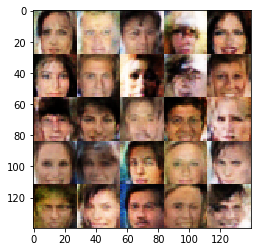

Epoch 1/1... Discriminator Loss: 0.8909... Generator Loss: 1.0829
Epoch 1/1... Discriminator Loss: 1.0453... Generator Loss: 0.7974
Epoch 1/1... Discriminator Loss: 1.0283... Generator Loss: 0.8049
Epoch 1/1... Discriminator Loss: 1.6775... Generator Loss: 0.3745
Epoch 1/1... Discriminator Loss: 0.9520... Generator Loss: 0.9036
Epoch 1/1... Discriminator Loss: 0.7881... Generator Loss: 1.2650
Epoch 1/1... Discriminator Loss: 1.8142... Generator Loss: 0.3528
Epoch 1/1... Discriminator Loss: 0.9686... Generator Loss: 1.2039
Epoch 1/1... Discriminator Loss: 1.6693... Generator Loss: 0.3870
Epoch 1/1... Discriminator Loss: 1.3250... Generator Loss: 0.5295


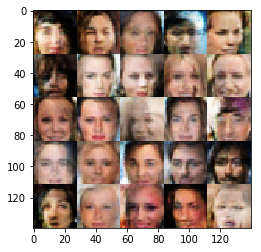

Epoch 1/1... Discriminator Loss: 1.8847... Generator Loss: 0.2870
Epoch 1/1... Discriminator Loss: 1.2743... Generator Loss: 0.6053
Epoch 1/1... Discriminator Loss: 1.1574... Generator Loss: 0.6406
Epoch 1/1... Discriminator Loss: 1.1016... Generator Loss: 0.6769
Epoch 1/1... Discriminator Loss: 0.9903... Generator Loss: 1.4538
Epoch 1/1... Discriminator Loss: 1.5090... Generator Loss: 0.4373
Epoch 1/1... Discriminator Loss: 2.1374... Generator Loss: 0.2096
Epoch 1/1... Discriminator Loss: 1.0467... Generator Loss: 1.8567
Epoch 1/1... Discriminator Loss: 1.0049... Generator Loss: 1.1573
Epoch 1/1... Discriminator Loss: 2.0134... Generator Loss: 0.2554


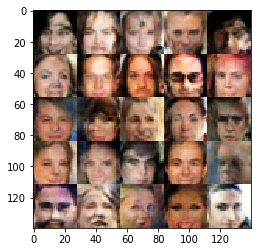

Epoch 1/1... Discriminator Loss: 1.4838... Generator Loss: 0.7839
Epoch 1/1... Discriminator Loss: 0.9475... Generator Loss: 0.8535
Epoch 1/1... Discriminator Loss: 1.6708... Generator Loss: 0.3450
Epoch 1/1... Discriminator Loss: 2.0970... Generator Loss: 0.2343
Epoch 1/1... Discriminator Loss: 2.3322... Generator Loss: 0.1630
Epoch 1/1... Discriminator Loss: 1.1171... Generator Loss: 0.6819
Epoch 1/1... Discriminator Loss: 1.7007... Generator Loss: 0.3411
Epoch 1/1... Discriminator Loss: 0.9885... Generator Loss: 0.7885
Epoch 1/1... Discriminator Loss: 0.9813... Generator Loss: 1.4567
Epoch 1/1... Discriminator Loss: 1.3025... Generator Loss: 2.1176


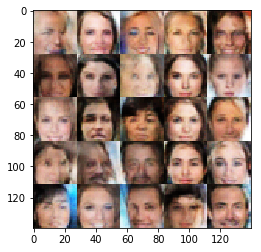

Epoch 1/1... Discriminator Loss: 1.2120... Generator Loss: 0.5750
Epoch 1/1... Discriminator Loss: 0.9593... Generator Loss: 1.1565
Epoch 1/1... Discriminator Loss: 1.6542... Generator Loss: 0.3625
Epoch 1/1... Discriminator Loss: 1.0000... Generator Loss: 0.8532
Epoch 1/1... Discriminator Loss: 0.8891... Generator Loss: 1.4552
Epoch 1/1... Discriminator Loss: 0.9541... Generator Loss: 0.9024
Epoch 1/1... Discriminator Loss: 0.9203... Generator Loss: 0.9922
Epoch 1/1... Discriminator Loss: 1.0149... Generator Loss: 0.7952
Epoch 1/1... Discriminator Loss: 1.5729... Generator Loss: 0.4273
Epoch 1/1... Discriminator Loss: 1.3525... Generator Loss: 0.5078


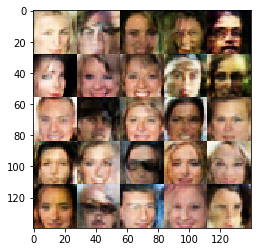

Epoch 1/1... Discriminator Loss: 1.0605... Generator Loss: 0.7097
Epoch 1/1... Discriminator Loss: 1.0347... Generator Loss: 0.7544
Epoch 1/1... Discriminator Loss: 1.1746... Generator Loss: 0.6454
Epoch 1/1... Discriminator Loss: 1.2531... Generator Loss: 0.5678
Epoch 1/1... Discriminator Loss: 0.9838... Generator Loss: 1.4589
Epoch 1/1... Discriminator Loss: 0.9302... Generator Loss: 1.0381
Epoch 1/1... Discriminator Loss: 1.2224... Generator Loss: 0.6065
Epoch 1/1... Discriminator Loss: 2.0287... Generator Loss: 0.3573
Epoch 1/1... Discriminator Loss: 1.5529... Generator Loss: 0.4610
Epoch 1/1... Discriminator Loss: 1.4551... Generator Loss: 0.4410


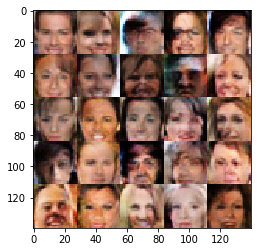

Epoch 1/1... Discriminator Loss: 1.3745... Generator Loss: 0.5063
Epoch 1/1... Discriminator Loss: 1.3593... Generator Loss: 0.5341
Epoch 1/1... Discriminator Loss: 1.0107... Generator Loss: 0.8162
Epoch 1/1... Discriminator Loss: 0.9161... Generator Loss: 1.2646
Epoch 1/1... Discriminator Loss: 1.8349... Generator Loss: 0.2799
Epoch 1/1... Discriminator Loss: 1.1940... Generator Loss: 0.6214
Epoch 1/1... Discriminator Loss: 1.2505... Generator Loss: 0.6431
Epoch 1/1... Discriminator Loss: 1.0395... Generator Loss: 1.8867
Epoch 1/1... Discriminator Loss: 1.5589... Generator Loss: 0.3865
Epoch 1/1... Discriminator Loss: 1.7783... Generator Loss: 0.3454


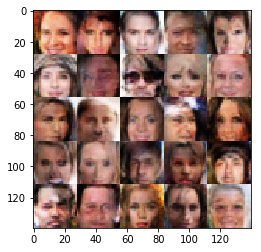

Epoch 1/1... Discriminator Loss: 1.1638... Generator Loss: 0.6338
Epoch 1/1... Discriminator Loss: 1.1134... Generator Loss: 2.1645
Epoch 1/1... Discriminator Loss: 0.8533... Generator Loss: 1.2628
Epoch 1/1... Discriminator Loss: 1.3918... Generator Loss: 0.4961
Epoch 1/1... Discriminator Loss: 1.2429... Generator Loss: 0.5698
Epoch 1/1... Discriminator Loss: 1.0027... Generator Loss: 0.8030
Epoch 1/1... Discriminator Loss: 0.8640... Generator Loss: 1.0322
Epoch 1/1... Discriminator Loss: 0.9738... Generator Loss: 1.5787
Epoch 1/1... Discriminator Loss: 0.9586... Generator Loss: 1.0152
Epoch 1/1... Discriminator Loss: 1.8932... Generator Loss: 0.3157


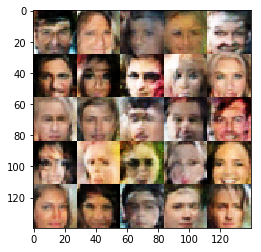

Epoch 1/1... Discriminator Loss: 0.9691... Generator Loss: 0.8472
Epoch 1/1... Discriminator Loss: 0.9908... Generator Loss: 0.8554
Epoch 1/1... Discriminator Loss: 0.9856... Generator Loss: 1.0361
Epoch 1/1... Discriminator Loss: 0.8699... Generator Loss: 1.0565
Epoch 1/1... Discriminator Loss: 1.7263... Generator Loss: 0.3150
Epoch 1/1... Discriminator Loss: 1.4171... Generator Loss: 0.4666
Epoch 1/1... Discriminator Loss: 0.8251... Generator Loss: 1.2192
Epoch 1/1... Discriminator Loss: 1.6301... Generator Loss: 0.3958
Epoch 1/1... Discriminator Loss: 1.9743... Generator Loss: 0.2575
Epoch 1/1... Discriminator Loss: 2.5045... Generator Loss: 0.1367


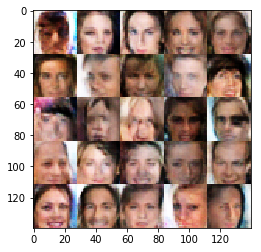

Epoch 1/1... Discriminator Loss: 1.0438... Generator Loss: 0.7971
Epoch 1/1... Discriminator Loss: 1.5871... Generator Loss: 0.3822
Epoch 1/1... Discriminator Loss: 1.4734... Generator Loss: 0.4607
Epoch 1/1... Discriminator Loss: 1.4489... Generator Loss: 0.4626
Epoch 1/1... Discriminator Loss: 1.1040... Generator Loss: 0.7878
Epoch 1/1... Discriminator Loss: 2.0065... Generator Loss: 0.2370
Epoch 1/1... Discriminator Loss: 2.0536... Generator Loss: 0.2259
Epoch 1/1... Discriminator Loss: 0.9670... Generator Loss: 1.3076
Epoch 1/1... Discriminator Loss: 0.7797... Generator Loss: 1.3266
Epoch 1/1... Discriminator Loss: 0.9632... Generator Loss: 0.8699


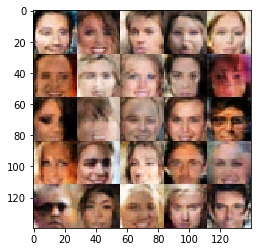

Epoch 1/1... Discriminator Loss: 0.9114... Generator Loss: 1.7444
Epoch 1/1... Discriminator Loss: 0.8109... Generator Loss: 1.1794
Epoch 1/1... Discriminator Loss: 0.9069... Generator Loss: 1.2481
Epoch 1/1... Discriminator Loss: 0.8460... Generator Loss: 1.4510
Epoch 1/1... Discriminator Loss: 1.4490... Generator Loss: 0.4520
Epoch 1/1... Discriminator Loss: 1.2448... Generator Loss: 0.7256
Epoch 1/1... Discriminator Loss: 1.5789... Generator Loss: 3.2005
Epoch 1/1... Discriminator Loss: 1.6154... Generator Loss: 0.3722
Epoch 1/1... Discriminator Loss: 0.8076... Generator Loss: 1.2808
Epoch 1/1... Discriminator Loss: 0.9573... Generator Loss: 0.9701


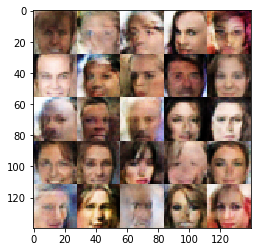

Epoch 1/1... Discriminator Loss: 1.0742... Generator Loss: 1.5007
Epoch 1/1... Discriminator Loss: 1.6900... Generator Loss: 0.3277
Epoch 1/1... Discriminator Loss: 0.9459... Generator Loss: 1.7479
Epoch 1/1... Discriminator Loss: 1.7277... Generator Loss: 0.3500
Epoch 1/1... Discriminator Loss: 1.0290... Generator Loss: 0.9600
Epoch 1/1... Discriminator Loss: 1.7360... Generator Loss: 0.3218
Epoch 1/1... Discriminator Loss: 1.4307... Generator Loss: 0.5161
Epoch 1/1... Discriminator Loss: 1.0552... Generator Loss: 0.9420
Epoch 1/1... Discriminator Loss: 1.5886... Generator Loss: 0.3949
Epoch 1/1... Discriminator Loss: 1.5829... Generator Loss: 0.3740


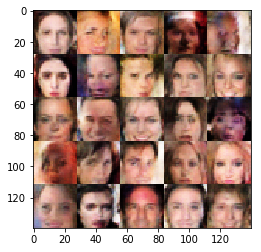

Epoch 1/1... Discriminator Loss: 0.8388... Generator Loss: 2.1770
Epoch 1/1... Discriminator Loss: 1.2066... Generator Loss: 0.6265
Epoch 1/1... Discriminator Loss: 1.1627... Generator Loss: 0.6232
Epoch 1/1... Discriminator Loss: 0.7166... Generator Loss: 1.3053
Epoch 1/1... Discriminator Loss: 1.0478... Generator Loss: 0.8360
Epoch 1/1... Discriminator Loss: 0.7202... Generator Loss: 1.2926
Epoch 1/1... Discriminator Loss: 0.8128... Generator Loss: 1.8574
Epoch 1/1... Discriminator Loss: 0.8370... Generator Loss: 1.0304
Epoch 1/1... Discriminator Loss: 1.0082... Generator Loss: 0.8387
Epoch 1/1... Discriminator Loss: 0.9234... Generator Loss: 1.1722


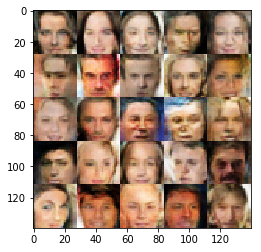

Epoch 1/1... Discriminator Loss: 1.2257... Generator Loss: 0.6000
Epoch 1/1... Discriminator Loss: 0.8465... Generator Loss: 0.9890
Epoch 1/1... Discriminator Loss: 0.9550... Generator Loss: 0.9471
Epoch 1/1... Discriminator Loss: 1.0598... Generator Loss: 0.8301
Epoch 1/1... Discriminator Loss: 1.5299... Generator Loss: 0.4250
Epoch 1/1... Discriminator Loss: 1.4678... Generator Loss: 0.4489
Epoch 1/1... Discriminator Loss: 1.3697... Generator Loss: 0.5202
Epoch 1/1... Discriminator Loss: 1.4659... Generator Loss: 0.4343
Epoch 1/1... Discriminator Loss: 1.8336... Generator Loss: 0.2684
Epoch 1/1... Discriminator Loss: 1.7237... Generator Loss: 0.3293


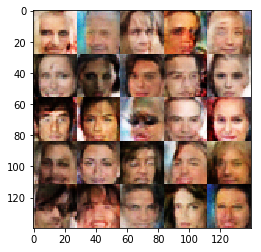

Epoch 1/1... Discriminator Loss: 1.7332... Generator Loss: 0.3369
Epoch 1/1... Discriminator Loss: 1.5474... Generator Loss: 0.4415
Epoch 1/1... Discriminator Loss: 1.4697... Generator Loss: 0.4829
Epoch 1/1... Discriminator Loss: 1.0880... Generator Loss: 0.7743
Epoch 1/1... Discriminator Loss: 0.8972... Generator Loss: 1.2702
Epoch 1/1... Discriminator Loss: 1.1812... Generator Loss: 0.5928
Epoch 1/1... Discriminator Loss: 1.0601... Generator Loss: 0.7686
Epoch 1/1... Discriminator Loss: 1.0838... Generator Loss: 1.9238
Epoch 1/1... Discriminator Loss: 0.9503... Generator Loss: 1.2900
Epoch 1/1... Discriminator Loss: 1.8607... Generator Loss: 0.2746


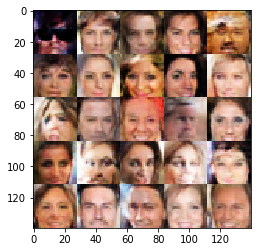

Epoch 1/1... Discriminator Loss: 1.9391... Generator Loss: 0.2628
Epoch 1/1... Discriminator Loss: 0.9935... Generator Loss: 1.1196
Epoch 1/1... Discriminator Loss: 0.9006... Generator Loss: 1.2771
Epoch 1/1... Discriminator Loss: 0.7917... Generator Loss: 1.2112
Epoch 1/1... Discriminator Loss: 1.3094... Generator Loss: 0.6038
Epoch 1/1... Discriminator Loss: 2.1175... Generator Loss: 0.2425
Epoch 1/1... Discriminator Loss: 0.7692... Generator Loss: 1.4937
Epoch 1/1... Discriminator Loss: 1.0342... Generator Loss: 0.7984
Epoch 1/1... Discriminator Loss: 1.2524... Generator Loss: 0.5636
Epoch 1/1... Discriminator Loss: 1.5659... Generator Loss: 0.4112


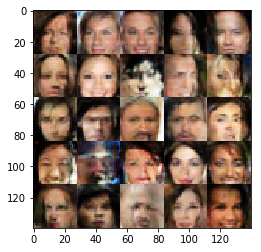

Epoch 1/1... Discriminator Loss: 1.5474... Generator Loss: 0.4324
Epoch 1/1... Discriminator Loss: 0.5699... Generator Loss: 1.7799
Epoch 1/1... Discriminator Loss: 1.8719... Generator Loss: 0.2956
Epoch 1/1... Discriminator Loss: 1.5343... Generator Loss: 0.4041
Epoch 1/1... Discriminator Loss: 2.1197... Generator Loss: 0.2241
Epoch 1/1... Discriminator Loss: 1.1926... Generator Loss: 2.8484
Epoch 1/1... Discriminator Loss: 0.9313... Generator Loss: 0.9479
Epoch 1/1... Discriminator Loss: 0.9402... Generator Loss: 1.3681
Epoch 1/1... Discriminator Loss: 1.1190... Generator Loss: 0.6956
Epoch 1/1... Discriminator Loss: 1.2338... Generator Loss: 0.5758


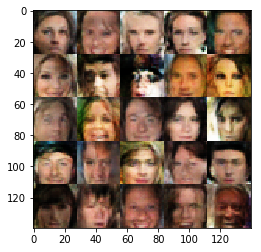

Epoch 1/1... Discriminator Loss: 1.2304... Generator Loss: 0.9921
Epoch 1/1... Discriminator Loss: 1.9222... Generator Loss: 0.3356
Epoch 1/1... Discriminator Loss: 1.2233... Generator Loss: 0.6031
Epoch 1/1... Discriminator Loss: 1.7569... Generator Loss: 0.3384
Epoch 1/1... Discriminator Loss: 1.0722... Generator Loss: 0.8147
Epoch 1/1... Discriminator Loss: 1.6767... Generator Loss: 0.3586
Epoch 1/1... Discriminator Loss: 0.9069... Generator Loss: 1.1014
Epoch 1/1... Discriminator Loss: 1.6682... Generator Loss: 0.3616
Epoch 1/1... Discriminator Loss: 0.8358... Generator Loss: 1.2507
Epoch 1/1... Discriminator Loss: 1.0916... Generator Loss: 1.1015


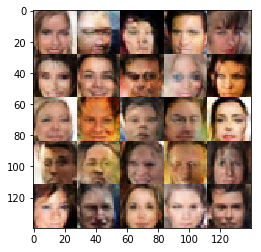

Epoch 1/1... Discriminator Loss: 1.9856... Generator Loss: 0.2480
Epoch 1/1... Discriminator Loss: 1.0724... Generator Loss: 1.2436
Epoch 1/1... Discriminator Loss: 1.5113... Generator Loss: 0.4067
Epoch 1/1... Discriminator Loss: 1.2929... Generator Loss: 0.5926
Epoch 1/1... Discriminator Loss: 1.2104... Generator Loss: 0.6240
Epoch 1/1... Discriminator Loss: 0.9974... Generator Loss: 1.9081
Epoch 1/1... Discriminator Loss: 1.5073... Generator Loss: 0.4164
Epoch 1/1... Discriminator Loss: 1.1869... Generator Loss: 0.6099
Epoch 1/1... Discriminator Loss: 0.8380... Generator Loss: 1.3205
Epoch 1/1... Discriminator Loss: 1.3024... Generator Loss: 0.5186


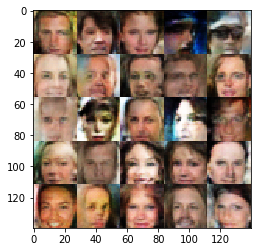

Epoch 1/1... Discriminator Loss: 1.0898... Generator Loss: 0.8661
Epoch 1/1... Discriminator Loss: 1.6916... Generator Loss: 0.3407
Epoch 1/1... Discriminator Loss: 1.6192... Generator Loss: 0.3428
Epoch 1/1... Discriminator Loss: 1.7073... Generator Loss: 0.3850
Epoch 1/1... Discriminator Loss: 1.5724... Generator Loss: 0.3995
Epoch 1/1... Discriminator Loss: 0.8868... Generator Loss: 1.1407
Epoch 1/1... Discriminator Loss: 0.6678... Generator Loss: 2.1709
Epoch 1/1... Discriminator Loss: 1.0263... Generator Loss: 1.0995
Epoch 1/1... Discriminator Loss: 1.2657... Generator Loss: 0.5963
Epoch 1/1... Discriminator Loss: 0.9186... Generator Loss: 0.9230


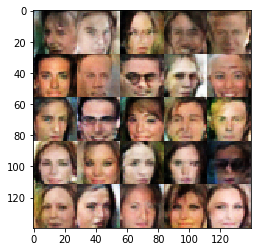

Epoch 1/1... Discriminator Loss: 0.8036... Generator Loss: 1.1862
Epoch 1/1... Discriminator Loss: 0.8909... Generator Loss: 0.9550
Epoch 1/1... Discriminator Loss: 0.7299... Generator Loss: 1.2919
Epoch 1/1... Discriminator Loss: 1.4218... Generator Loss: 0.4699
Epoch 1/1... Discriminator Loss: 0.7355... Generator Loss: 1.3861
Epoch 1/1... Discriminator Loss: 1.9120... Generator Loss: 0.3070
Epoch 1/1... Discriminator Loss: 1.1247... Generator Loss: 0.7131
Epoch 1/1... Discriminator Loss: 1.4503... Generator Loss: 0.4726
Epoch 1/1... Discriminator Loss: 0.7203... Generator Loss: 1.6715
Epoch 1/1... Discriminator Loss: 0.8480... Generator Loss: 1.1051


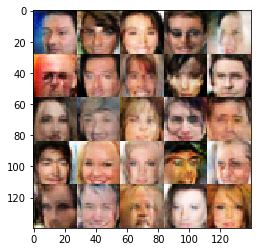

Epoch 1/1... Discriminator Loss: 1.8589... Generator Loss: 0.2930
Epoch 1/1... Discriminator Loss: 0.8364... Generator Loss: 2.2952
Epoch 1/1... Discriminator Loss: 1.0771... Generator Loss: 0.9081
Epoch 1/1... Discriminator Loss: 0.9084... Generator Loss: 0.9986
Epoch 1/1... Discriminator Loss: 1.0042... Generator Loss: 0.7682
Epoch 1/1... Discriminator Loss: 1.9033... Generator Loss: 0.2820
Epoch 1/1... Discriminator Loss: 1.4440... Generator Loss: 0.4286
Epoch 1/1... Discriminator Loss: 1.6334... Generator Loss: 0.3614
Epoch 1/1... Discriminator Loss: 1.3853... Generator Loss: 0.4945
Epoch 1/1... Discriminator Loss: 1.9432... Generator Loss: 0.3038


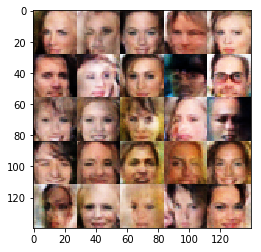

Epoch 1/1... Discriminator Loss: 2.2375... Generator Loss: 0.1804
Epoch 1/1... Discriminator Loss: 1.8390... Generator Loss: 0.3025
Epoch 1/1... Discriminator Loss: 1.3653... Generator Loss: 0.5361
Epoch 1/1... Discriminator Loss: 0.8883... Generator Loss: 1.2847
Epoch 1/1... Discriminator Loss: 2.0470... Generator Loss: 0.2449
Epoch 1/1... Discriminator Loss: 2.1665... Generator Loss: 0.2243
Epoch 1/1... Discriminator Loss: 1.0704... Generator Loss: 1.3268
Epoch 1/1... Discriminator Loss: 1.3490... Generator Loss: 0.5018
Epoch 1/1... Discriminator Loss: 1.4513... Generator Loss: 0.4661
Epoch 1/1... Discriminator Loss: 1.0834... Generator Loss: 1.5286


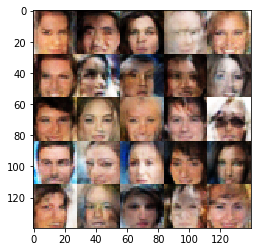

Epoch 1/1... Discriminator Loss: 1.2700... Generator Loss: 0.5428
Epoch 1/1... Discriminator Loss: 1.2384... Generator Loss: 0.6397
Epoch 1/1... Discriminator Loss: 1.0347... Generator Loss: 0.8619
Epoch 1/1... Discriminator Loss: 1.9883... Generator Loss: 0.2898
Epoch 1/1... Discriminator Loss: 1.0965... Generator Loss: 0.7137
Epoch 1/1... Discriminator Loss: 1.9647... Generator Loss: 0.2564
Epoch 1/1... Discriminator Loss: 1.0317... Generator Loss: 1.3194
Epoch 1/1... Discriminator Loss: 1.4258... Generator Loss: 0.4873
Epoch 1/1... Discriminator Loss: 1.1666... Generator Loss: 0.8325
Epoch 1/1... Discriminator Loss: 0.8494... Generator Loss: 2.1364


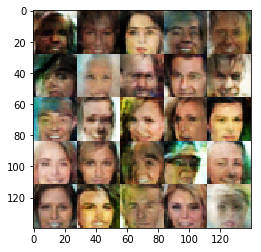

Epoch 1/1... Discriminator Loss: 1.4822... Generator Loss: 0.4679
Epoch 1/1... Discriminator Loss: 1.3300... Generator Loss: 0.5144
Epoch 1/1... Discriminator Loss: 0.9952... Generator Loss: 0.9002
Epoch 1/1... Discriminator Loss: 1.1472... Generator Loss: 0.6551
Epoch 1/1... Discriminator Loss: 1.2157... Generator Loss: 0.6713
Epoch 1/1... Discriminator Loss: 0.7456... Generator Loss: 1.3785
Epoch 1/1... Discriminator Loss: 1.0449... Generator Loss: 0.8584
Epoch 1/1... Discriminator Loss: 0.8132... Generator Loss: 1.1673
Epoch 1/1... Discriminator Loss: 1.0672... Generator Loss: 0.8200
Epoch 1/1... Discriminator Loss: 1.9344... Generator Loss: 0.2601


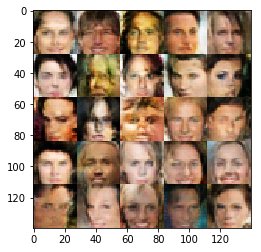

Epoch 1/1... Discriminator Loss: 1.0978... Generator Loss: 0.6823
Epoch 1/1... Discriminator Loss: 1.9477... Generator Loss: 0.2440
Epoch 1/1... Discriminator Loss: 1.3319... Generator Loss: 2.6969
Epoch 1/1... Discriminator Loss: 1.3149... Generator Loss: 0.4894
Epoch 1/1... Discriminator Loss: 0.8743... Generator Loss: 1.7446
Epoch 1/1... Discriminator Loss: 1.4782... Generator Loss: 0.4261
Epoch 1/1... Discriminator Loss: 1.4582... Generator Loss: 0.4730
Epoch 1/1... Discriminator Loss: 1.4656... Generator Loss: 0.4607
Epoch 1/1... Discriminator Loss: 1.5958... Generator Loss: 0.3752
Epoch 1/1... Discriminator Loss: 1.0815... Generator Loss: 0.8003


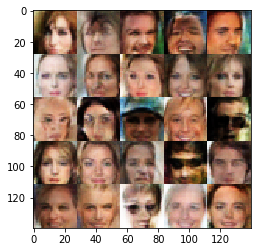

Epoch 1/1... Discriminator Loss: 1.1111... Generator Loss: 0.7809
Epoch 1/1... Discriminator Loss: 0.9565... Generator Loss: 1.0221
Epoch 1/1... Discriminator Loss: 0.9240... Generator Loss: 0.8878
Epoch 1/1... Discriminator Loss: 0.9367... Generator Loss: 1.0620
Epoch 1/1... Discriminator Loss: 0.8300... Generator Loss: 1.2962
Epoch 1/1... Discriminator Loss: 1.1308... Generator Loss: 0.7862
Epoch 1/1... Discriminator Loss: 0.7226... Generator Loss: 2.0206
Epoch 1/1... Discriminator Loss: 0.8975... Generator Loss: 1.4868
Epoch 1/1... Discriminator Loss: 1.4716... Generator Loss: 0.4198
Epoch 1/1... Discriminator Loss: 1.4805... Generator Loss: 0.4451


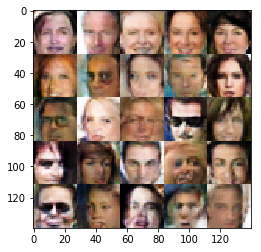

Epoch 1/1... Discriminator Loss: 1.8018... Generator Loss: 0.3291
Epoch 1/1... Discriminator Loss: 0.8911... Generator Loss: 1.4140
Epoch 1/1... Discriminator Loss: 0.8023... Generator Loss: 1.3898
Epoch 1/1... Discriminator Loss: 0.8157... Generator Loss: 1.2019
Epoch 1/1... Discriminator Loss: 0.8866... Generator Loss: 1.5182
Epoch 1/1... Discriminator Loss: 1.2195... Generator Loss: 0.6331
Epoch 1/1... Discriminator Loss: 1.1656... Generator Loss: 1.5856
Epoch 1/1... Discriminator Loss: 1.2332... Generator Loss: 0.5683
Epoch 1/1... Discriminator Loss: 1.0926... Generator Loss: 0.9915
Epoch 1/1... Discriminator Loss: 1.4002... Generator Loss: 0.4648


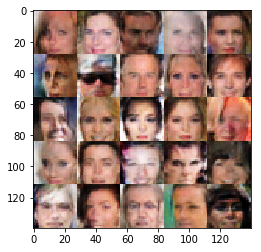

Epoch 1/1... Discriminator Loss: 2.1423... Generator Loss: 0.2477
Epoch 1/1... Discriminator Loss: 1.3249... Generator Loss: 0.6066
Epoch 1/1... Discriminator Loss: 0.8383... Generator Loss: 1.2315
Epoch 1/1... Discriminator Loss: 1.1153... Generator Loss: 0.7968
Epoch 1/1... Discriminator Loss: 2.0087... Generator Loss: 0.2570
Epoch 1/1... Discriminator Loss: 1.5752... Generator Loss: 0.4029
Epoch 1/1... Discriminator Loss: 0.9951... Generator Loss: 0.9005
Epoch 1/1... Discriminator Loss: 2.1025... Generator Loss: 0.2549
Epoch 1/1... Discriminator Loss: 1.1850... Generator Loss: 0.5964
Epoch 1/1... Discriminator Loss: 0.9637... Generator Loss: 0.8867


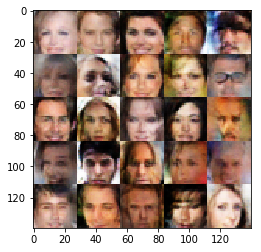

Epoch 1/1... Discriminator Loss: 0.8893... Generator Loss: 0.9574
Epoch 1/1... Discriminator Loss: 1.2306... Generator Loss: 0.5875
Epoch 1/1... Discriminator Loss: 1.0030... Generator Loss: 1.5459
Epoch 1/1... Discriminator Loss: 1.2602... Generator Loss: 0.5824
Epoch 1/1... Discriminator Loss: 1.0659... Generator Loss: 1.0046
Epoch 1/1... Discriminator Loss: 0.9483... Generator Loss: 0.9013
Epoch 1/1... Discriminator Loss: 1.9971... Generator Loss: 0.2455
Epoch 1/1... Discriminator Loss: 1.5451... Generator Loss: 0.3978
Epoch 1/1... Discriminator Loss: 0.8871... Generator Loss: 1.0134
Epoch 1/1... Discriminator Loss: 0.9485... Generator Loss: 1.0342


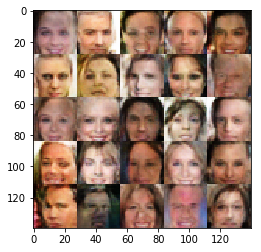

Epoch 1/1... Discriminator Loss: 1.0186... Generator Loss: 1.0321
Epoch 1/1... Discriminator Loss: 2.2805... Generator Loss: 0.1814
Epoch 1/1... Discriminator Loss: 1.1266... Generator Loss: 0.7439
Epoch 1/1... Discriminator Loss: 0.9125... Generator Loss: 1.0153
Epoch 1/1... Discriminator Loss: 0.9339... Generator Loss: 1.0128
Epoch 1/1... Discriminator Loss: 2.0264... Generator Loss: 0.2575
Epoch 1/1... Discriminator Loss: 0.8557... Generator Loss: 2.4179
Epoch 1/1... Discriminator Loss: 1.0976... Generator Loss: 0.7836
Epoch 1/1... Discriminator Loss: 1.0509... Generator Loss: 0.7702
Epoch 1/1... Discriminator Loss: 1.2269... Generator Loss: 0.5863


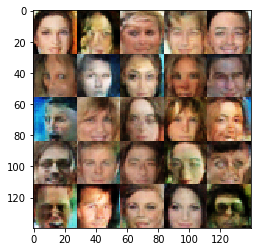

Epoch 1/1... Discriminator Loss: 0.9104... Generator Loss: 1.0028
Epoch 1/1... Discriminator Loss: 1.0729... Generator Loss: 0.6847
Epoch 1/1... Discriminator Loss: 1.9344... Generator Loss: 0.2745
Epoch 1/1... Discriminator Loss: 1.1367... Generator Loss: 0.6707
Epoch 1/1... Discriminator Loss: 2.0979... Generator Loss: 0.2056
Epoch 1/1... Discriminator Loss: 1.1118... Generator Loss: 0.7955
Epoch 1/1... Discriminator Loss: 1.9517... Generator Loss: 0.2592
Epoch 1/1... Discriminator Loss: 1.4029... Generator Loss: 0.5054
Epoch 1/1... Discriminator Loss: 1.7316... Generator Loss: 0.3583
Epoch 1/1... Discriminator Loss: 1.5839... Generator Loss: 0.3741


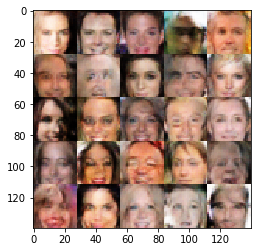

Epoch 1/1... Discriminator Loss: 2.0018... Generator Loss: 0.2650
Epoch 1/1... Discriminator Loss: 0.8306... Generator Loss: 1.6757
Epoch 1/1... Discriminator Loss: 1.0626... Generator Loss: 0.8784
Epoch 1/1... Discriminator Loss: 0.8136... Generator Loss: 1.3565
Epoch 1/1... Discriminator Loss: 1.0174... Generator Loss: 0.8374
Epoch 1/1... Discriminator Loss: 1.4149... Generator Loss: 0.4520
Epoch 1/1... Discriminator Loss: 0.9471... Generator Loss: 0.8758
Epoch 1/1... Discriminator Loss: 0.8972... Generator Loss: 1.3464
Epoch 1/1... Discriminator Loss: 2.5209... Generator Loss: 0.1466
Epoch 1/1... Discriminator Loss: 1.3000... Generator Loss: 0.5159


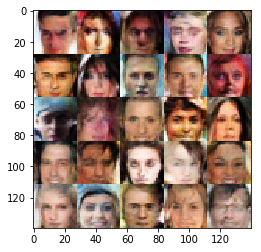

Epoch 1/1... Discriminator Loss: 1.2146... Generator Loss: 0.6126
Epoch 1/1... Discriminator Loss: 1.0777... Generator Loss: 0.9160
Epoch 1/1... Discriminator Loss: 1.1172... Generator Loss: 2.3060
Epoch 1/1... Discriminator Loss: 1.7687... Generator Loss: 0.3242
Epoch 1/1... Discriminator Loss: 1.4483... Generator Loss: 0.4660
Epoch 1/1... Discriminator Loss: 2.0280... Generator Loss: 0.2615
Epoch 1/1... Discriminator Loss: 2.1967... Generator Loss: 0.2005
Epoch 1/1... Discriminator Loss: 0.9148... Generator Loss: 0.9737
Epoch 1/1... Discriminator Loss: 1.9957... Generator Loss: 0.2390
Epoch 1/1... Discriminator Loss: 1.0238... Generator Loss: 1.0533


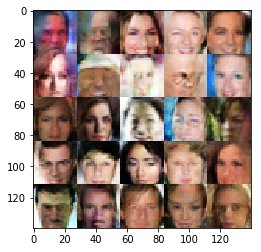

Epoch 1/1... Discriminator Loss: 1.0346... Generator Loss: 0.8092
Epoch 1/1... Discriminator Loss: 1.3882... Generator Loss: 0.4857
Epoch 1/1... Discriminator Loss: 0.9442... Generator Loss: 0.8829
Epoch 1/1... Discriminator Loss: 1.7592... Generator Loss: 0.3564
Epoch 1/1... Discriminator Loss: 0.9791... Generator Loss: 1.1459
Epoch 1/1... Discriminator Loss: 1.9895... Generator Loss: 0.3101
Epoch 1/1... Discriminator Loss: 1.0175... Generator Loss: 0.7661
Epoch 1/1... Discriminator Loss: 1.7120... Generator Loss: 0.3802
Epoch 1/1... Discriminator Loss: 1.6525... Generator Loss: 0.3736
Epoch 1/1... Discriminator Loss: 1.8241... Generator Loss: 0.3036


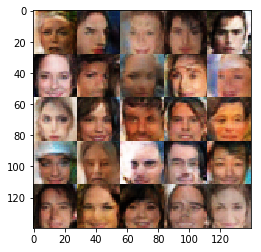

Epoch 1/1... Discriminator Loss: 1.5065... Generator Loss: 0.4208
Epoch 1/1... Discriminator Loss: 1.2319... Generator Loss: 0.5992
Epoch 1/1... Discriminator Loss: 1.6451... Generator Loss: 0.4042
Epoch 1/1... Discriminator Loss: 0.9480... Generator Loss: 1.4173
Epoch 1/1... Discriminator Loss: 1.1238... Generator Loss: 0.7978
Epoch 1/1... Discriminator Loss: 1.0263... Generator Loss: 0.8643
Epoch 1/1... Discriminator Loss: 0.6818... Generator Loss: 1.9540
Epoch 1/1... Discriminator Loss: 1.3868... Generator Loss: 0.4683
Epoch 1/1... Discriminator Loss: 1.5495... Generator Loss: 0.4274
Epoch 1/1... Discriminator Loss: 1.4233... Generator Loss: 0.4914


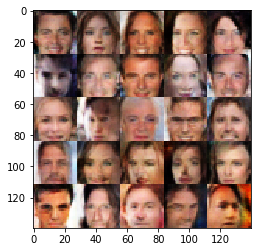

Epoch 1/1... Discriminator Loss: 0.7181... Generator Loss: 1.4857
Epoch 1/1... Discriminator Loss: 1.1315... Generator Loss: 0.8987
Epoch 1/1... Discriminator Loss: 1.1180... Generator Loss: 0.7096
Epoch 1/1... Discriminator Loss: 1.2483... Generator Loss: 0.5732
Epoch 1/1... Discriminator Loss: 0.8671... Generator Loss: 1.0642
Epoch 1/1... Discriminator Loss: 1.4130... Generator Loss: 0.4513
Epoch 1/1... Discriminator Loss: 0.6498... Generator Loss: 1.7280
Epoch 1/1... Discriminator Loss: 1.3297... Generator Loss: 0.5094
Epoch 1/1... Discriminator Loss: 1.6247... Generator Loss: 0.3934
Epoch 1/1... Discriminator Loss: 1.3017... Generator Loss: 0.5376


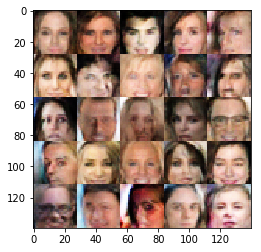

Epoch 1/1... Discriminator Loss: 1.7462... Generator Loss: 0.3601
Epoch 1/1... Discriminator Loss: 1.3181... Generator Loss: 0.5762
Epoch 1/1... Discriminator Loss: 1.2410... Generator Loss: 0.6488
Epoch 1/1... Discriminator Loss: 1.0186... Generator Loss: 0.9179
Epoch 1/1... Discriminator Loss: 1.6261... Generator Loss: 0.3507
Epoch 1/1... Discriminator Loss: 0.9298... Generator Loss: 0.9212
Epoch 1/1... Discriminator Loss: 1.1817... Generator Loss: 0.8625
Epoch 1/1... Discriminator Loss: 1.2455... Generator Loss: 0.7752
Epoch 1/1... Discriminator Loss: 0.7092... Generator Loss: 1.2444
Epoch 1/1... Discriminator Loss: 0.8362... Generator Loss: 1.1293


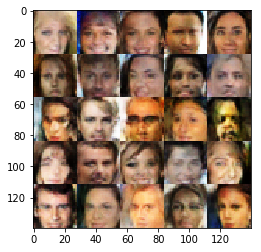

Epoch 1/1... Discriminator Loss: 2.0292... Generator Loss: 0.2631
Epoch 1/1... Discriminator Loss: 1.5722... Generator Loss: 0.4531
Epoch 1/1... Discriminator Loss: 0.8032... Generator Loss: 1.2866
Epoch 1/1... Discriminator Loss: 0.9659... Generator Loss: 1.2269
Epoch 1/1... Discriminator Loss: 0.8549... Generator Loss: 1.6136
Epoch 1/1... Discriminator Loss: 1.1896... Generator Loss: 0.6022
Epoch 1/1... Discriminator Loss: 1.5725... Generator Loss: 0.4129
Epoch 1/1... Discriminator Loss: 0.9926... Generator Loss: 0.9456
Epoch 1/1... Discriminator Loss: 1.0136... Generator Loss: 1.0007
Epoch 1/1... Discriminator Loss: 1.1005... Generator Loss: 1.6183


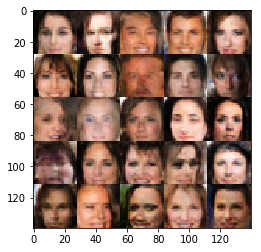

Epoch 1/1... Discriminator Loss: 1.3508... Generator Loss: 0.5556
Epoch 1/1... Discriminator Loss: 1.1958... Generator Loss: 0.6237
Epoch 1/1... Discriminator Loss: 0.8341... Generator Loss: 1.1985
Epoch 1/1... Discriminator Loss: 1.1114... Generator Loss: 0.9445
Epoch 1/1... Discriminator Loss: 1.4045... Generator Loss: 0.5859
Epoch 1/1... Discriminator Loss: 0.9763... Generator Loss: 1.6468
Epoch 1/1... Discriminator Loss: 1.2149... Generator Loss: 0.6326
Epoch 1/1... Discriminator Loss: 1.3016... Generator Loss: 2.6908
Epoch 1/1... Discriminator Loss: 1.4524... Generator Loss: 0.4368
Epoch 1/1... Discriminator Loss: 1.4932... Generator Loss: 0.4178


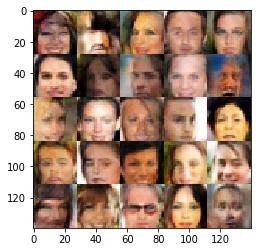

In [13]:
batch_size = 25
z_dim = 100
learning_rate = 0.0005
beta1 = 0.2

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.